In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]='SimHei'#解决中文乱码
plt.rcParams['axes.unicode_minus'] = False#解决负号无法正常显示的问题
plt.rcParams['figure.dpi']=300

In [ ]:
# 任务1.1

In [2]:
LR_data = pd.read_csv("LR.csv",  usecols=['Stkcd', 'Accper', 'Typrep', 'B001000000', 'B001100000', 'B001101000',
                                         'B001200000', 'B001201000', 'B001207000', 'B001209000', 'B001210000',
                                         'B001211000', 'B001212000', 'B001303000', 'B002300000'])


# print(data)

LR_data_A = LR_data[LR_data['Typrep'] == 'A']

# 保存为 LR_1.csv 文件，并编码为 UTF-8
LR_data_A.to_csv('LR_1.csv', index=False, encoding='utf-8')

# 输出筛选后的数据行数和列数
print(f'LR_1.csv 文件共有 {LR_data_A.shape[0]} 行，{LR_data_A.shape[1]} 列。')

LR_1.csv 文件共有 33414 行，15 列。


In [ ]:
# 任务1.2

In [5]:
import pandas as pd

# 读取数据文件
LR_1 = pd.read_csv('LR_1.csv')
ZCFZ = pd.read_csv('ZCFZ.csv')
Stk_ind = pd.read_csv('Stk_ind.csv',encoding='gbk')

# 根据“Stkcd”、“Accper”和“Typrep”三个字段，提取“ZCFZ.csv”中字段为“A002000000”和“A001000000”的相应数据
ZCFZ_selected = ZCFZ[['Stkcd', 'Accper', 'Typrep', 'A002000000', 'A001000000']]

# 将提取的数据合并到“LR_1.csv”中
result = pd.merge(LR_1, ZCFZ_selected, on=['Stkcd', 'Accper', 'Typrep'], how='left')

# 根据字段“Stkcd”，提取“Stk_ind.csv”中字段为“Indnme”和“Nindnme”的相应数据
Stk_ind_selected = Stk_ind[['Stkcd', 'Indnme', 'Nindnme']]

# 将提取的数据合并到“LR_1.csv”中
result = pd.merge(result, Stk_ind_selected, on='Stkcd', how='left')

# 将合并后的数据保存到新的文件中
result.to_csv('LR_2.csv', index=False, encoding='utf-8')

# 输出合并后数据的行数和列数
print('合并后数据的行数和列数：', result.shape)

合并后数据的行数和列数： (33414, 19)


In [6]:
# 将合并后的数据保存到新的文件中
result.to_csv('LR_2.csv', index=False, encoding='utf-8')

In [ ]:
# 任务1.3

In [7]:
LR_2 = pd.read_csv("LR_2.csv")

# 删除空值占比达 70%及以上的数据列
LR_3 = LR_2.dropna(thresh=0.3*len(LR_2), axis=1)

# LR_3.to_csv("LR_3.csv", encoding='utf-8', index=False)
print("处理后数据的列数：", LR_3.shape[1])

处理后数据的列数： 17


In [8]:
LR_3.to_csv("LR_3.csv", encoding='utf-8', index=False)

In [ ]:
# 任务1.4

In [10]:
LR_3 = pd.read_csv('LR_3.csv')
LR_3 = LR_3.dropna()
LR_3.shape[0]

30888

In [11]:
LR_3.to_csv("LR_4.csv", encoding='utf-8', index=False)

In [ ]:
# 任务1.5

In [12]:
LR_4 = pd.read_csv('LR_4.csv')
LR_4['Accper'] = pd.to_datetime(LR_4['Accper']).dt.strftime('%Y-%m-%d')
LR_4.to_csv('LR_5.csv', index=False, encoding='utf-8')

In [ ]:
# 任务1.6

In [15]:
LR_5 = pd.read_csv('LR_5.csv')

# 计算利润率和资产负债率
LR_5['利润率'] = LR_5['B001000000'] / LR_5['B001100000']
LR_5['资产负债率'] = LR_5['A002000000'] / LR_5['A001000000']

# 删除利润率、资产负债率不在[-300%，300%]范围内的行
LR_new = LR_5[(LR_5['利润率'] >= -3) & (LR_5['利润率'] <= 3) & (LR_5['资产负债率'] >= -3) & (LR_5['资产负债率'] <= 3)]

LR_new.to_csv('LR_new.csv', index=False, encoding='utf-8')

print('处理后数据的行数和列数：', LR_new.shape)

print('前5个企业的利润率和资产负债率：')
print(LR_new[['利润率', '资产负债率']].head())

处理后数据的行数和列数： (30690, 19)
前 5 个企业的利润率和资产负债率：
        利润率     资产负债率
0  0.461509  0.595244
1  0.186811  0.225886
2  0.335129  0.340623
3  0.191888  0.325698
4  0.623156  0.520855


In [ ]:
# 任务2财务数据指标分析及可视化

In [ ]:
# 任务2.1

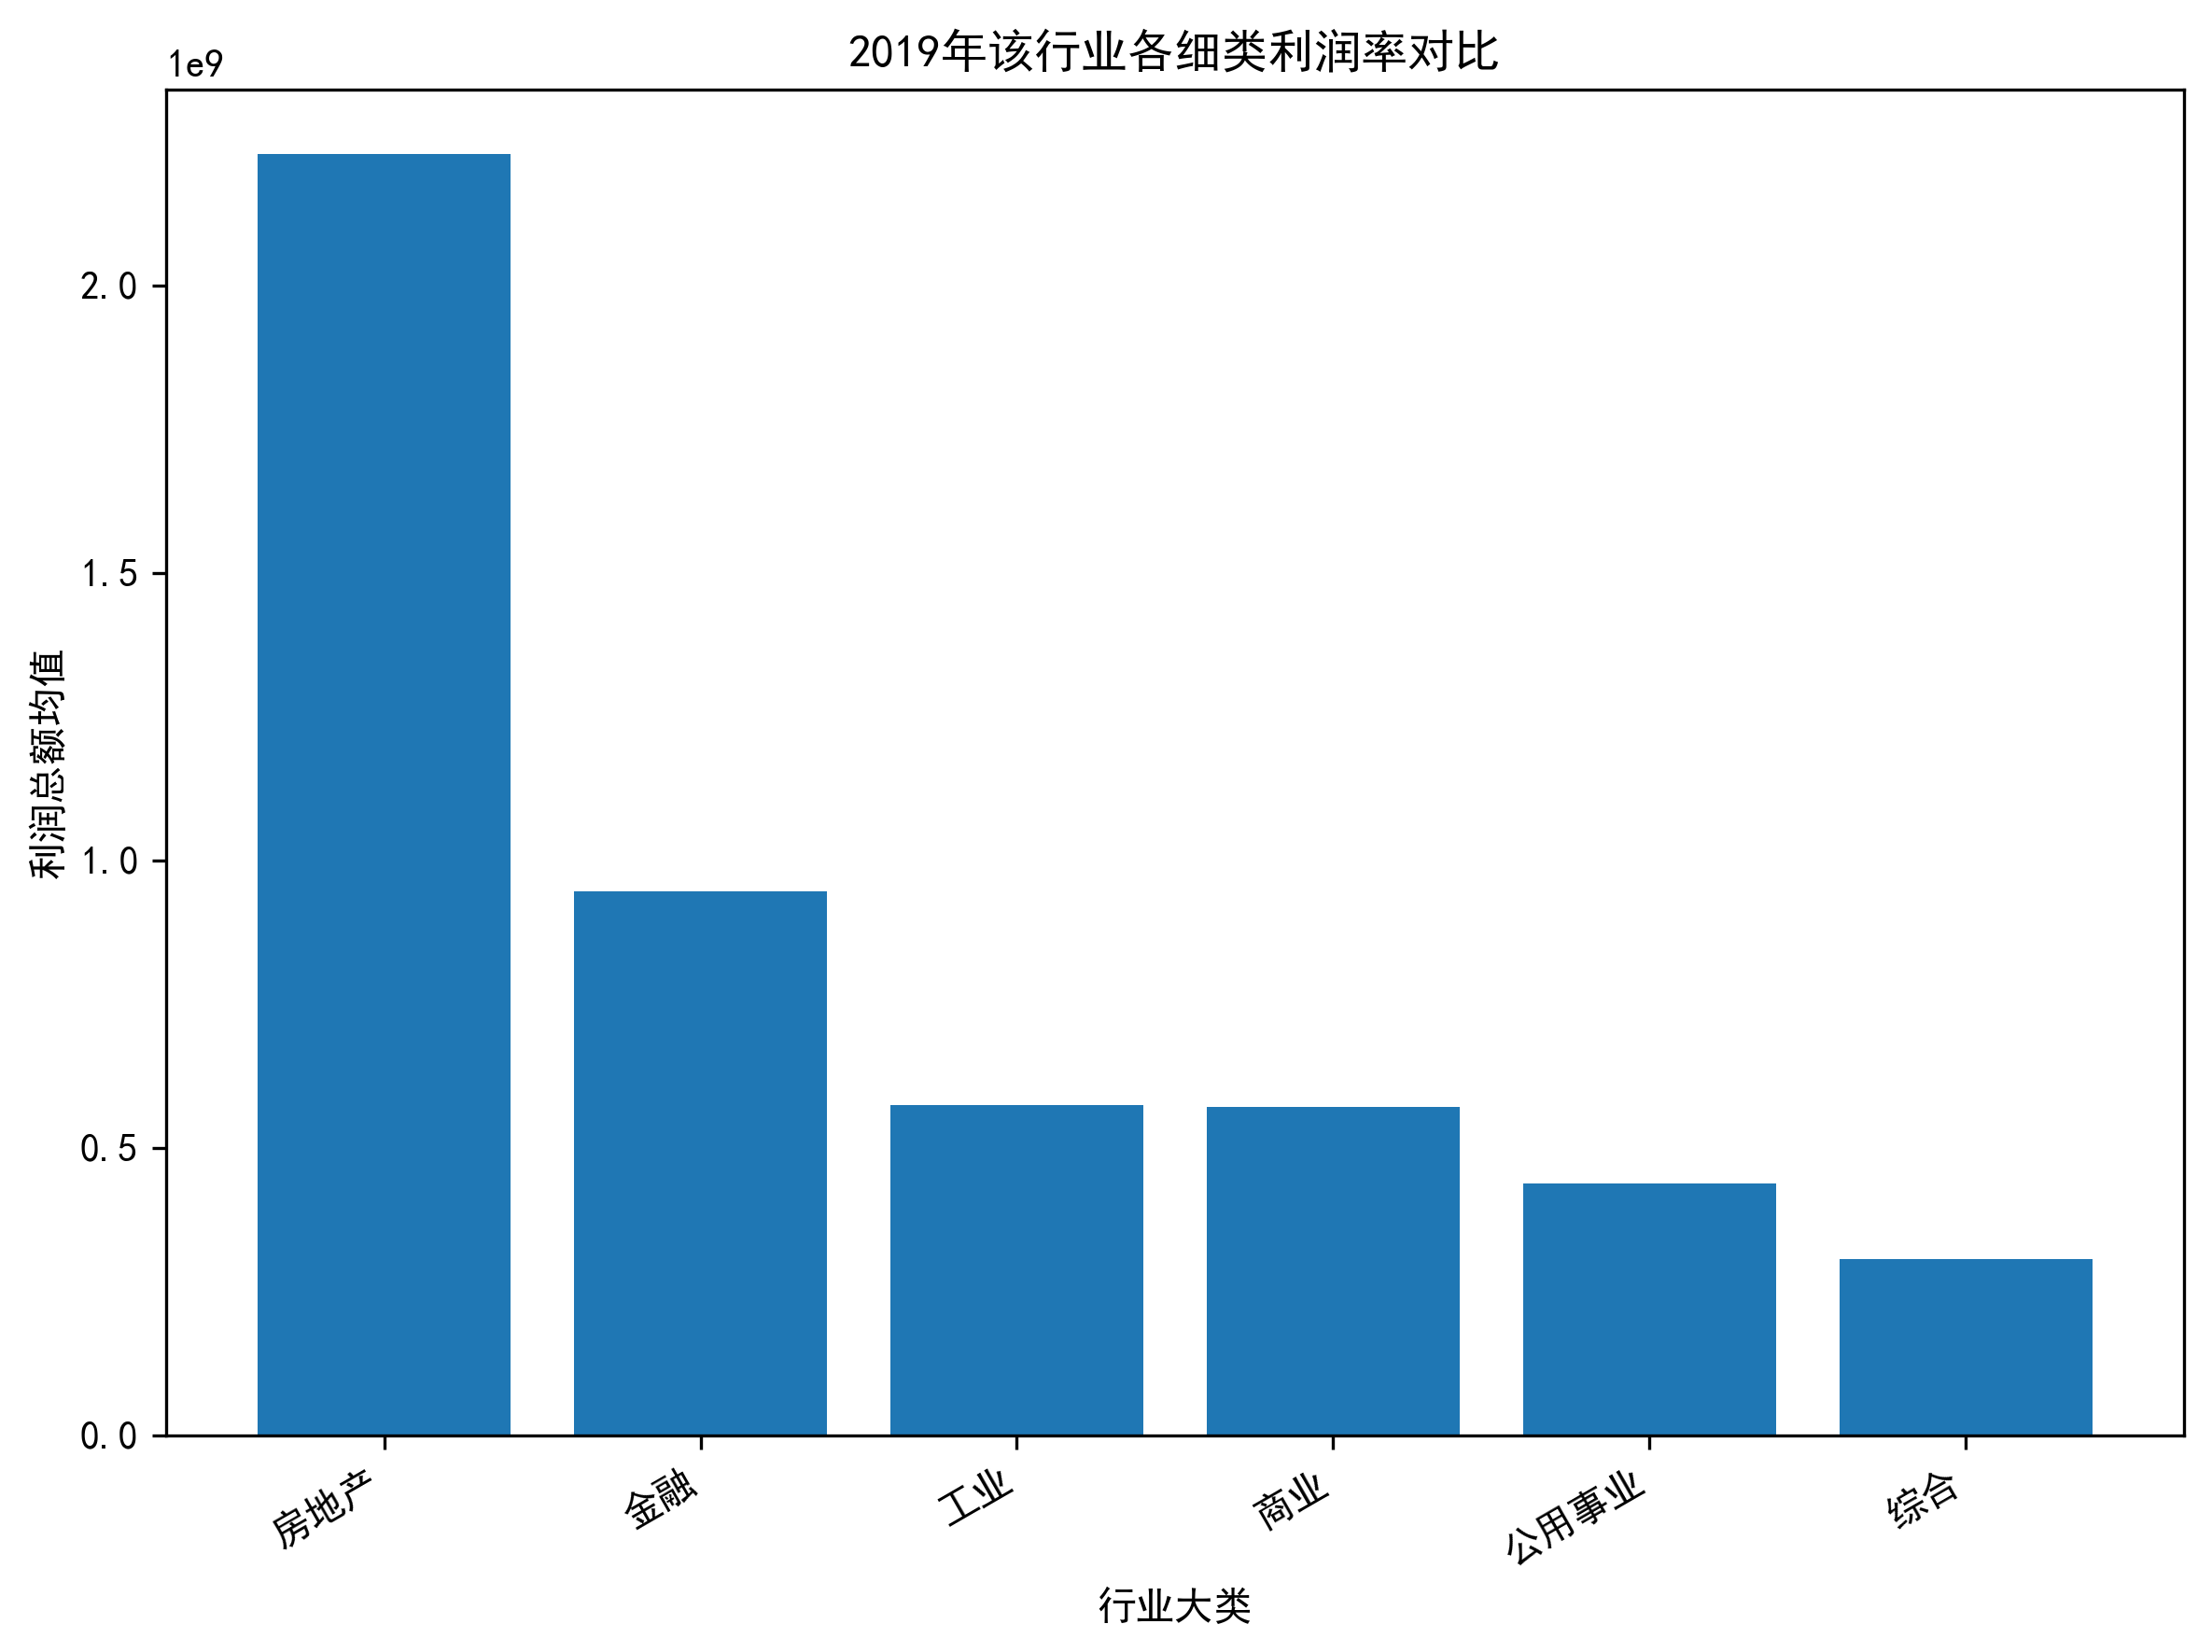

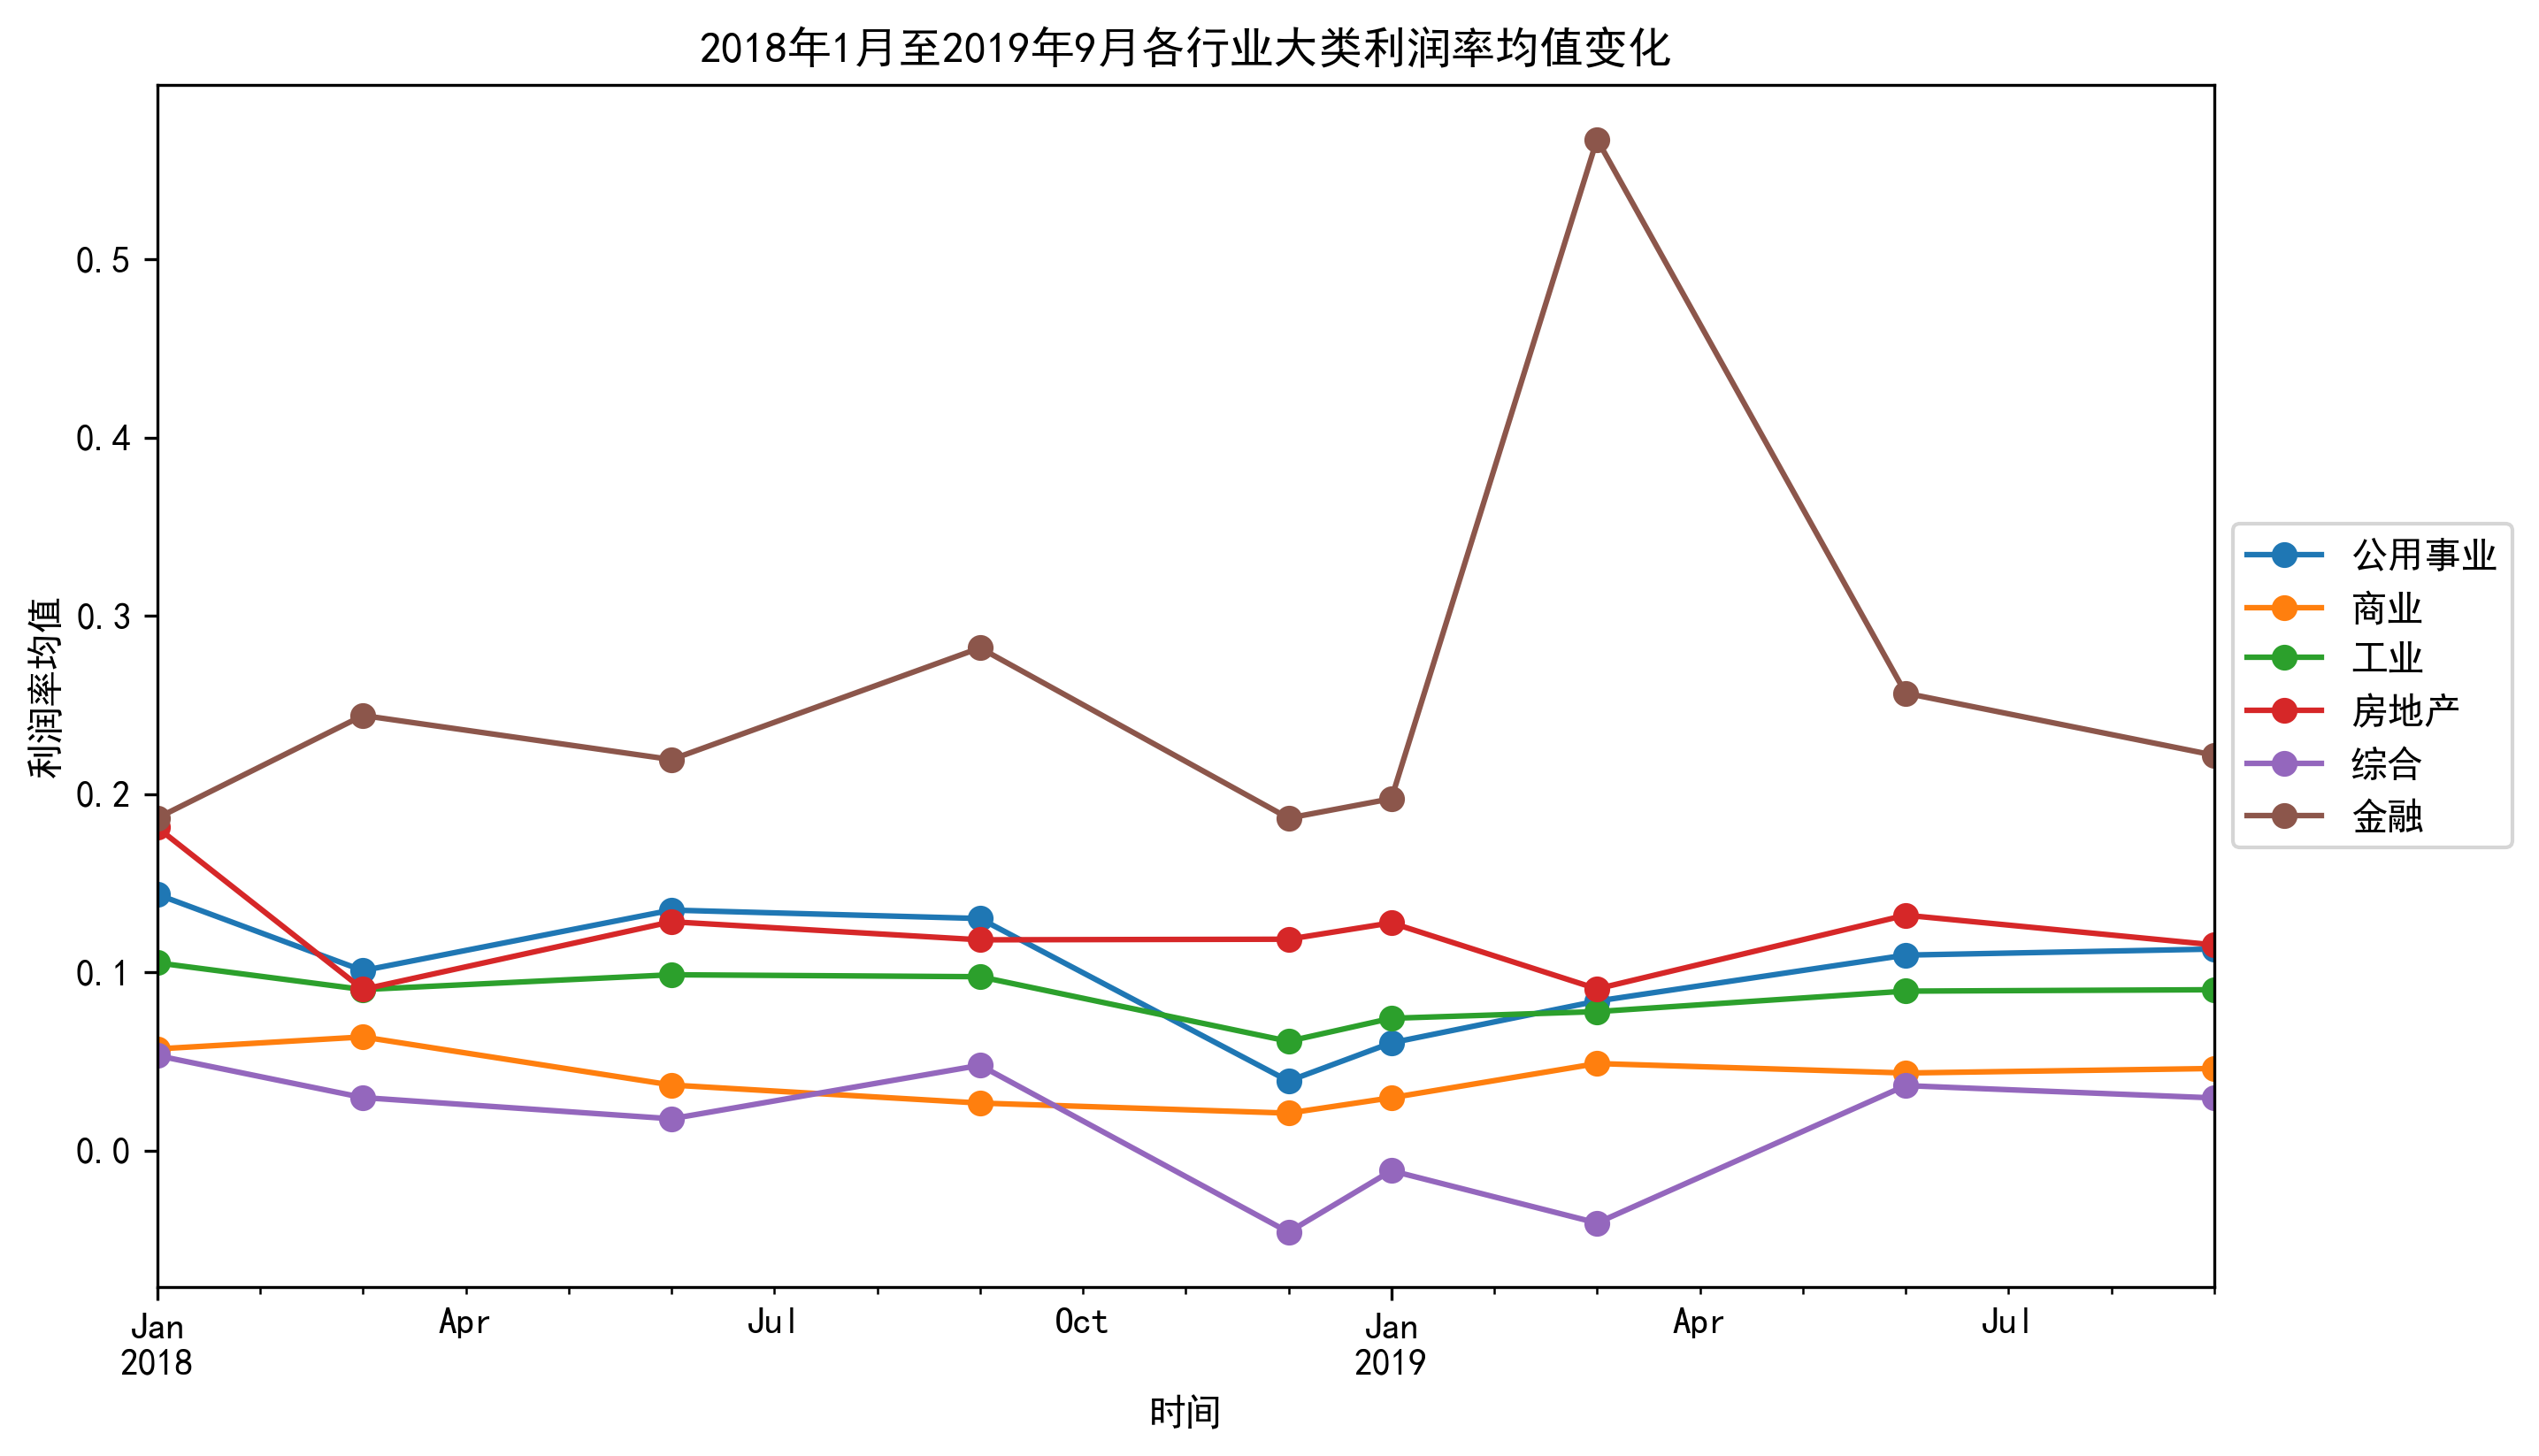

In [9]:
LR_new = pd.read_csv('LR_new.csv')
LR_new['Accper'] = pd.to_datetime(LR_new['Accper'])
LR_new_201909 = LR_new[(LR_new['Accper'] >= '2019-09-01')&(LR_new['Accper'] <= '2019-09-30')]
# 统计不同行业大类 2019 年 9 月利润总额的均值，并绘制柱状图
fig1_data = LR_new_201909.groupby('Indnme')['B001000000'].mean().sort_values(ascending=False)
fig1 = plt.figure(figsize=(8, 6))
plt.bar(fig1_data.index, fig1_data.values)
plt.xticks(rotation=30, ha='right')
plt.xlabel('行业大类')
plt.ylabel('利润总额均值')
plt.title('2019年该行业各细类利润率对比')
plt.tight_layout()
plt.savefig('plot_2.1.1.png')
plt.show()


# 转换日期格式为年月
LR_new['Accper'] = pd.to_datetime(LR_new['Accper']).dt.to_period('M')

# 筛选出2018年1月至2019年9月的数据
data_filtered = LR_new[(LR_new['Accper'] >= '2018-01') & (LR_new['Accper'] <= '2019-09')]

# 计算行业大类利润率的均值
mean_profit_rate_by_industry = data_filtered.groupby(['Accper', 'Indnme'])['利润率'].mean().unstack()

# 绘制折线图
mean_profit_rate_by_industry.plot(marker='o', figsize=(10, 6))
plt.xlabel('时间')
plt.ylabel('利润率均值')
plt.title('2018年1月至2019年9月各行业大类利润率均值变化')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 调整图例位置

# 显示图表
plt.savefig('plot_2.1.2.png')
plt.show()

In [ ]:
#任务2.2

In [224]:
# 确定 2019 年 9 月营业利润率均值排名第 1 的行业大类
fig1_data = LR_new.groupby('Indnme')['利润率'].mean().sort_values(ascending=False)
print('2019年9月营业利润率均值排名第1的行业大类：', fig1_data.index[0])

2019年9月营业利润率均值排名第1的行业大类： 金融


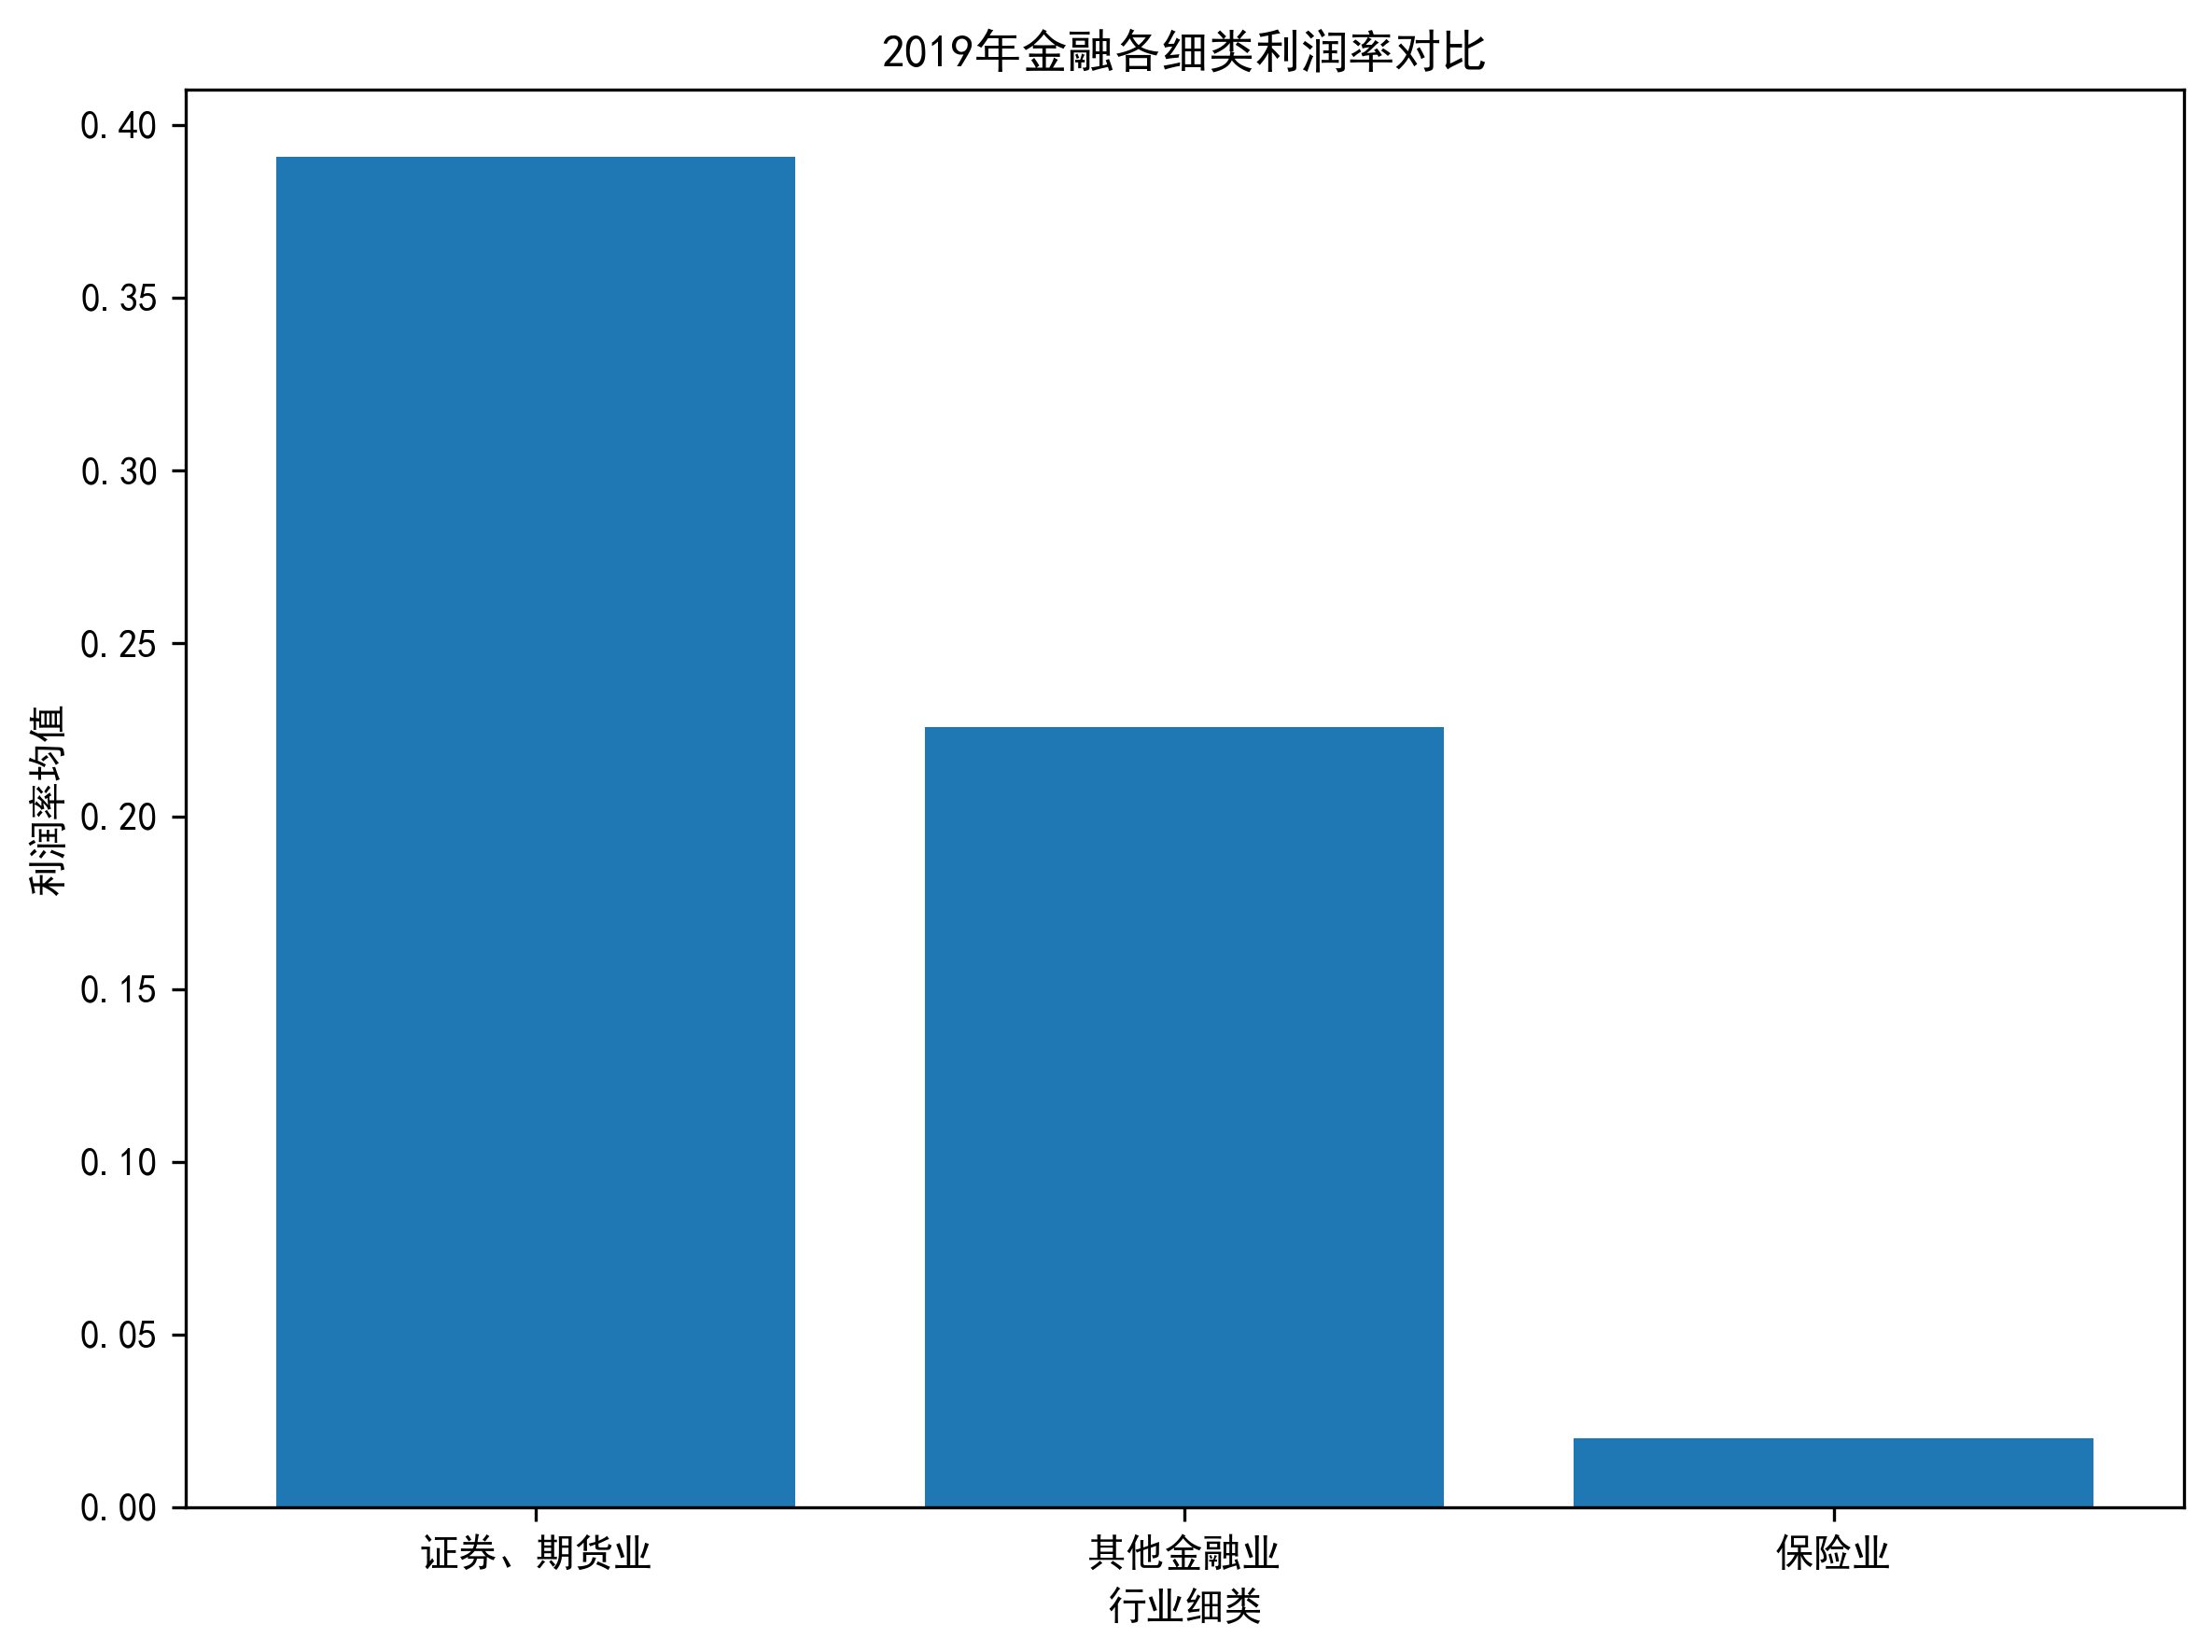

In [10]:
# 2019年金融各细类利润率对比

# 统计 2019 年金融产业各细类利润率均值，并绘制柱状图
fig2_data = LR_new[LR_new['Indnme'] == '金融'].groupby('Nindnme')['利润率'].mean().sort_values(ascending=False)
# 取前三名作为绘图数据
fig2_data = fig2_data.iloc[:3]
fig2 = plt.figure(figsize=(8, 6))
plt.bar(fig2_data.index, fig2_data.values)
plt.xlabel('行业细类')
plt.ylabel('利润率均值')
plt.title('2019年金融各细类利润率对比')
plt.tight_layout()
plt.savefig('plot_2.2.1.png')
plt.show()

D:\App\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


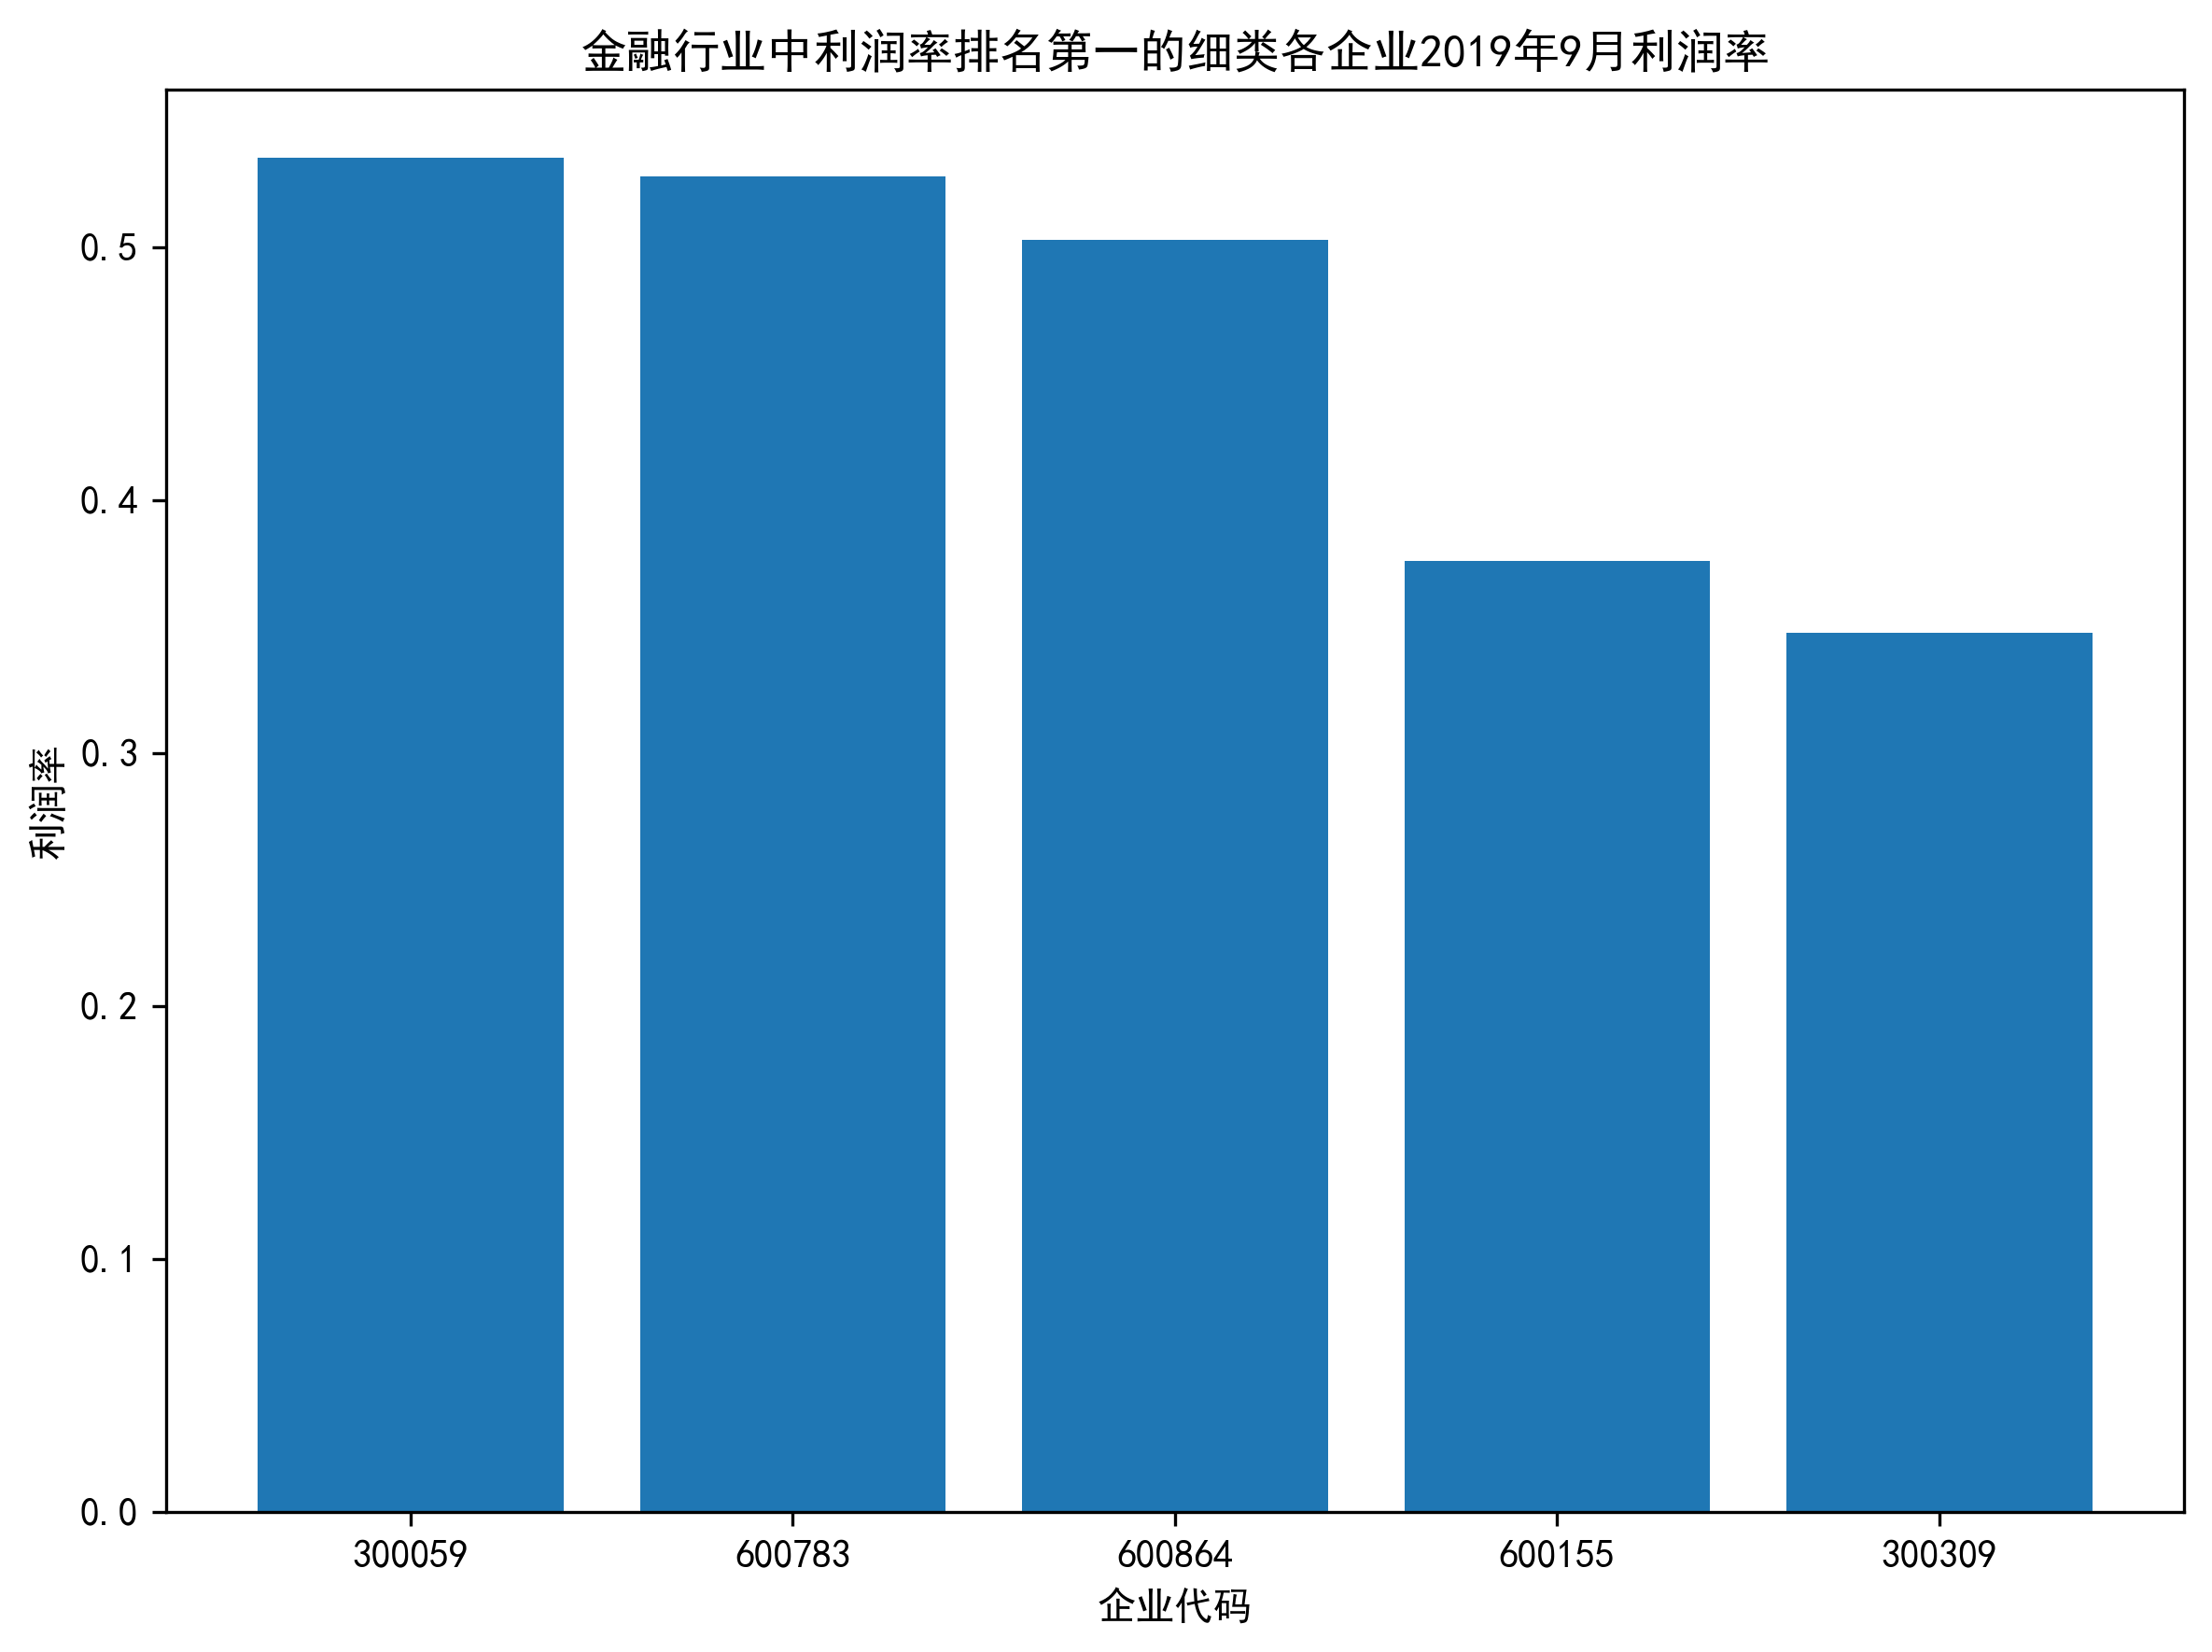

In [11]:
# 对金融行业中利润率排名第一的细类各企业2019年9月利润率进行排序
# 筛选出金融行业中利润率排名第一的细类
# 筛选出2019年9月30的数据
LR_new_201909 = LR_new[LR_new['Accper'] == '2019-09-30']
fig4_data = LR_new_201909[LR_new_201909['Indnme'] == '金融'].sort_values(by='利润率', ascending=False)
fig_data = fig4_data[fig4_data['Nindnme'] == '证券、期货业'].sort_values(by='利润率', ascending=False)
top = fig_data.iloc[:5]
top['Stkcd'] = top['Stkcd'].astype(str)
#绘制排名前五的企业利润率柱状图
fig4 = plt.figure(figsize=(8, 6))
plt.bar(top['Stkcd'], top['利润率'])
plt.xlabel('企业代码')
plt.ylabel('利润率')
plt.title('金融行业中利润率排名第一的细类各企业2019年9月利润率')
plt.tight_layout()
plt.savefig('plot_2.2.2.png')
plt.show()

In [12]:
T1 = top.iloc[0]
T1

Stkcd              300059
Accper            2019-09
Typrep                  A
B001100000    3.09676e+09
B001101000    1.05907e+09
B001200000    1.66957e+09
B001201000     2.8918e+08
B001207000    3.11183e+07
B001209000    2.45953e+08
B001210000    1.07704e+09
B001211000    9.59772e+06
B001212000    1.66848e+07
B001000000     1.6586e+09
A002000000    3.25554e+10
A001000000    5.33324e+10
Indnme                 金融
Nindnme            证券、期货业
利润率              0.535592
资产负债率            0.610424
Name: 23392, dtype: object

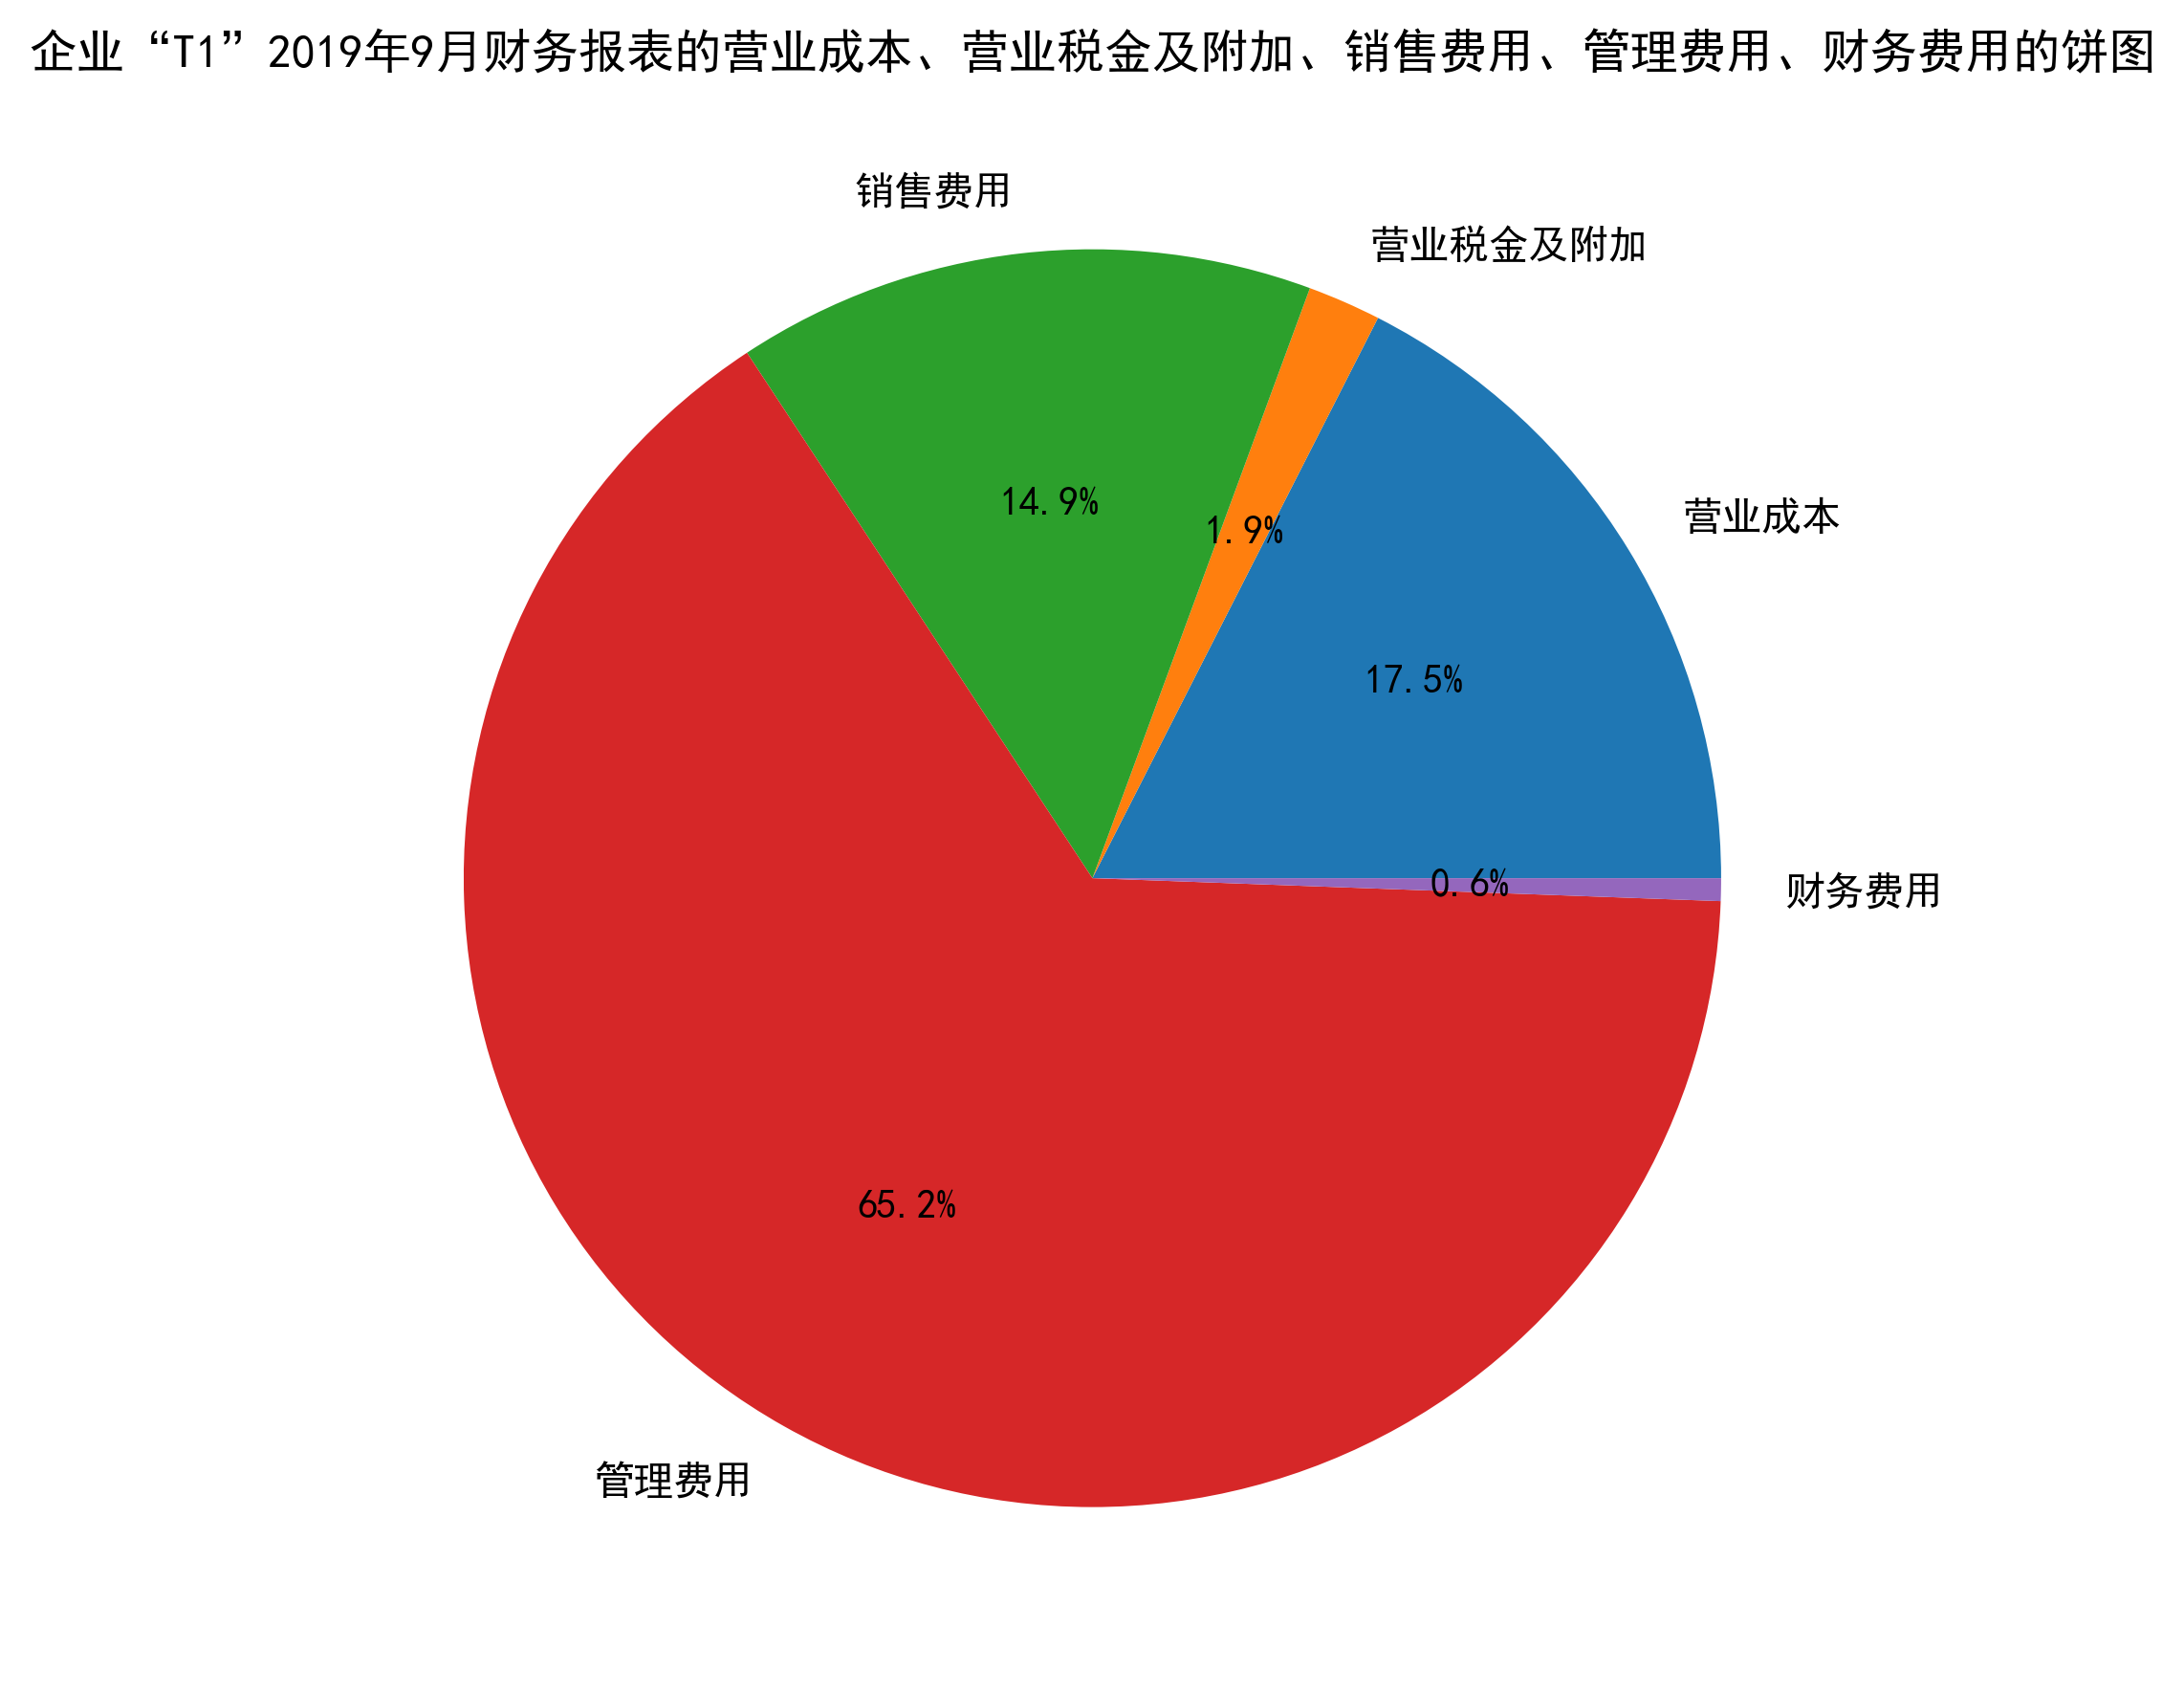

In [13]:
#绘制企业“T1”2019 年 9 月财务报表的营业成本、营业税金及附加、销售费用、管理费用、财务费用的饼图
T1 = T1[['B001201000', 'B001207000', 'B001209000', 'B001210000', 'B001211000']]
T1.rename(index={'B001201000': '营业成本', 'B001207000': '营业税金及附加', 'B001209000': '销售费用', 'B001210000': '管理费用', 'B001211000': '财务费用'}, inplace=True)
fig5 = plt.figure(figsize=(8, 6))
plt.pie(T1, labels=T1.index, autopct='%1.1f%%')
plt.title('企业“T1”2019年9月财务报表的营业成本、营业税金及附加、销售费用、管理费用、财务费用的饼图')
plt.tight_layout()
plt.savefig('plot_2.2.3.png')
plt.show()

In [14]:
# 取出2019-01---2019-09的数据
T1_Stkcd = 300059
T1_2019 = LR_new[(LR_new['Accper'] >= '2019-01') & (LR_new['Accper'] <= '2019-09') & (LR_new['Stkcd']==T1_Stkcd)]
T1_2019

,Stkcd,Accper,Typrep,B001100000,B001101000,B001200000,B001201000,B001207000,B001209000,B001210000,B001211000,B001212000,B001000000,A002000000,A001000000,Indnme,Nindnme,利润率,资产负债率
18559,300059,2019-03,A,9.267591e+08,3.210003e+08,5.620134e+08,9.564718e+07,9126762.03,8.147275e+07,3.342576e+08,3.276393e+07,8745140.51,4.590224e+08,4.551168e+10,6.380477e+10,金融,证券、期货业,0.495299,0.713296
19804,300059,2019-06,A,1.997742e+09,6.769593e+08,1.130847e+09,1.859926e+08,21624423.91,1.641269e+08,7.178001e+08,3.021691e+07,11086031.84,1.043203e+09,3.420219e+10,5.444673e+10,金融,证券、期货业,0.522191,0.628177
23392,300059,2019-09,A,3.096765e+09,1.059071e+09,1.669572e+09,2.891800e+08,31118310.78,2.459533e+08,1.077037e+09,9.597721e+06,16684787.50,1.658602e+09,3.255539e+10,5.333240e+10,金融,证券、期货业,0.535592,0.610424
27639,300059,2019-01,A,3.123446e+09,1.309581e+09,2.272443e+09,3.713357e+08,31033977.04,2.597752e+08,1.441938e+09,1.564518e+08,11908623.24,1.120834e+09,2.411572e+10,3.981096e+10,金融,证券、期货业,0.358845,0.605756


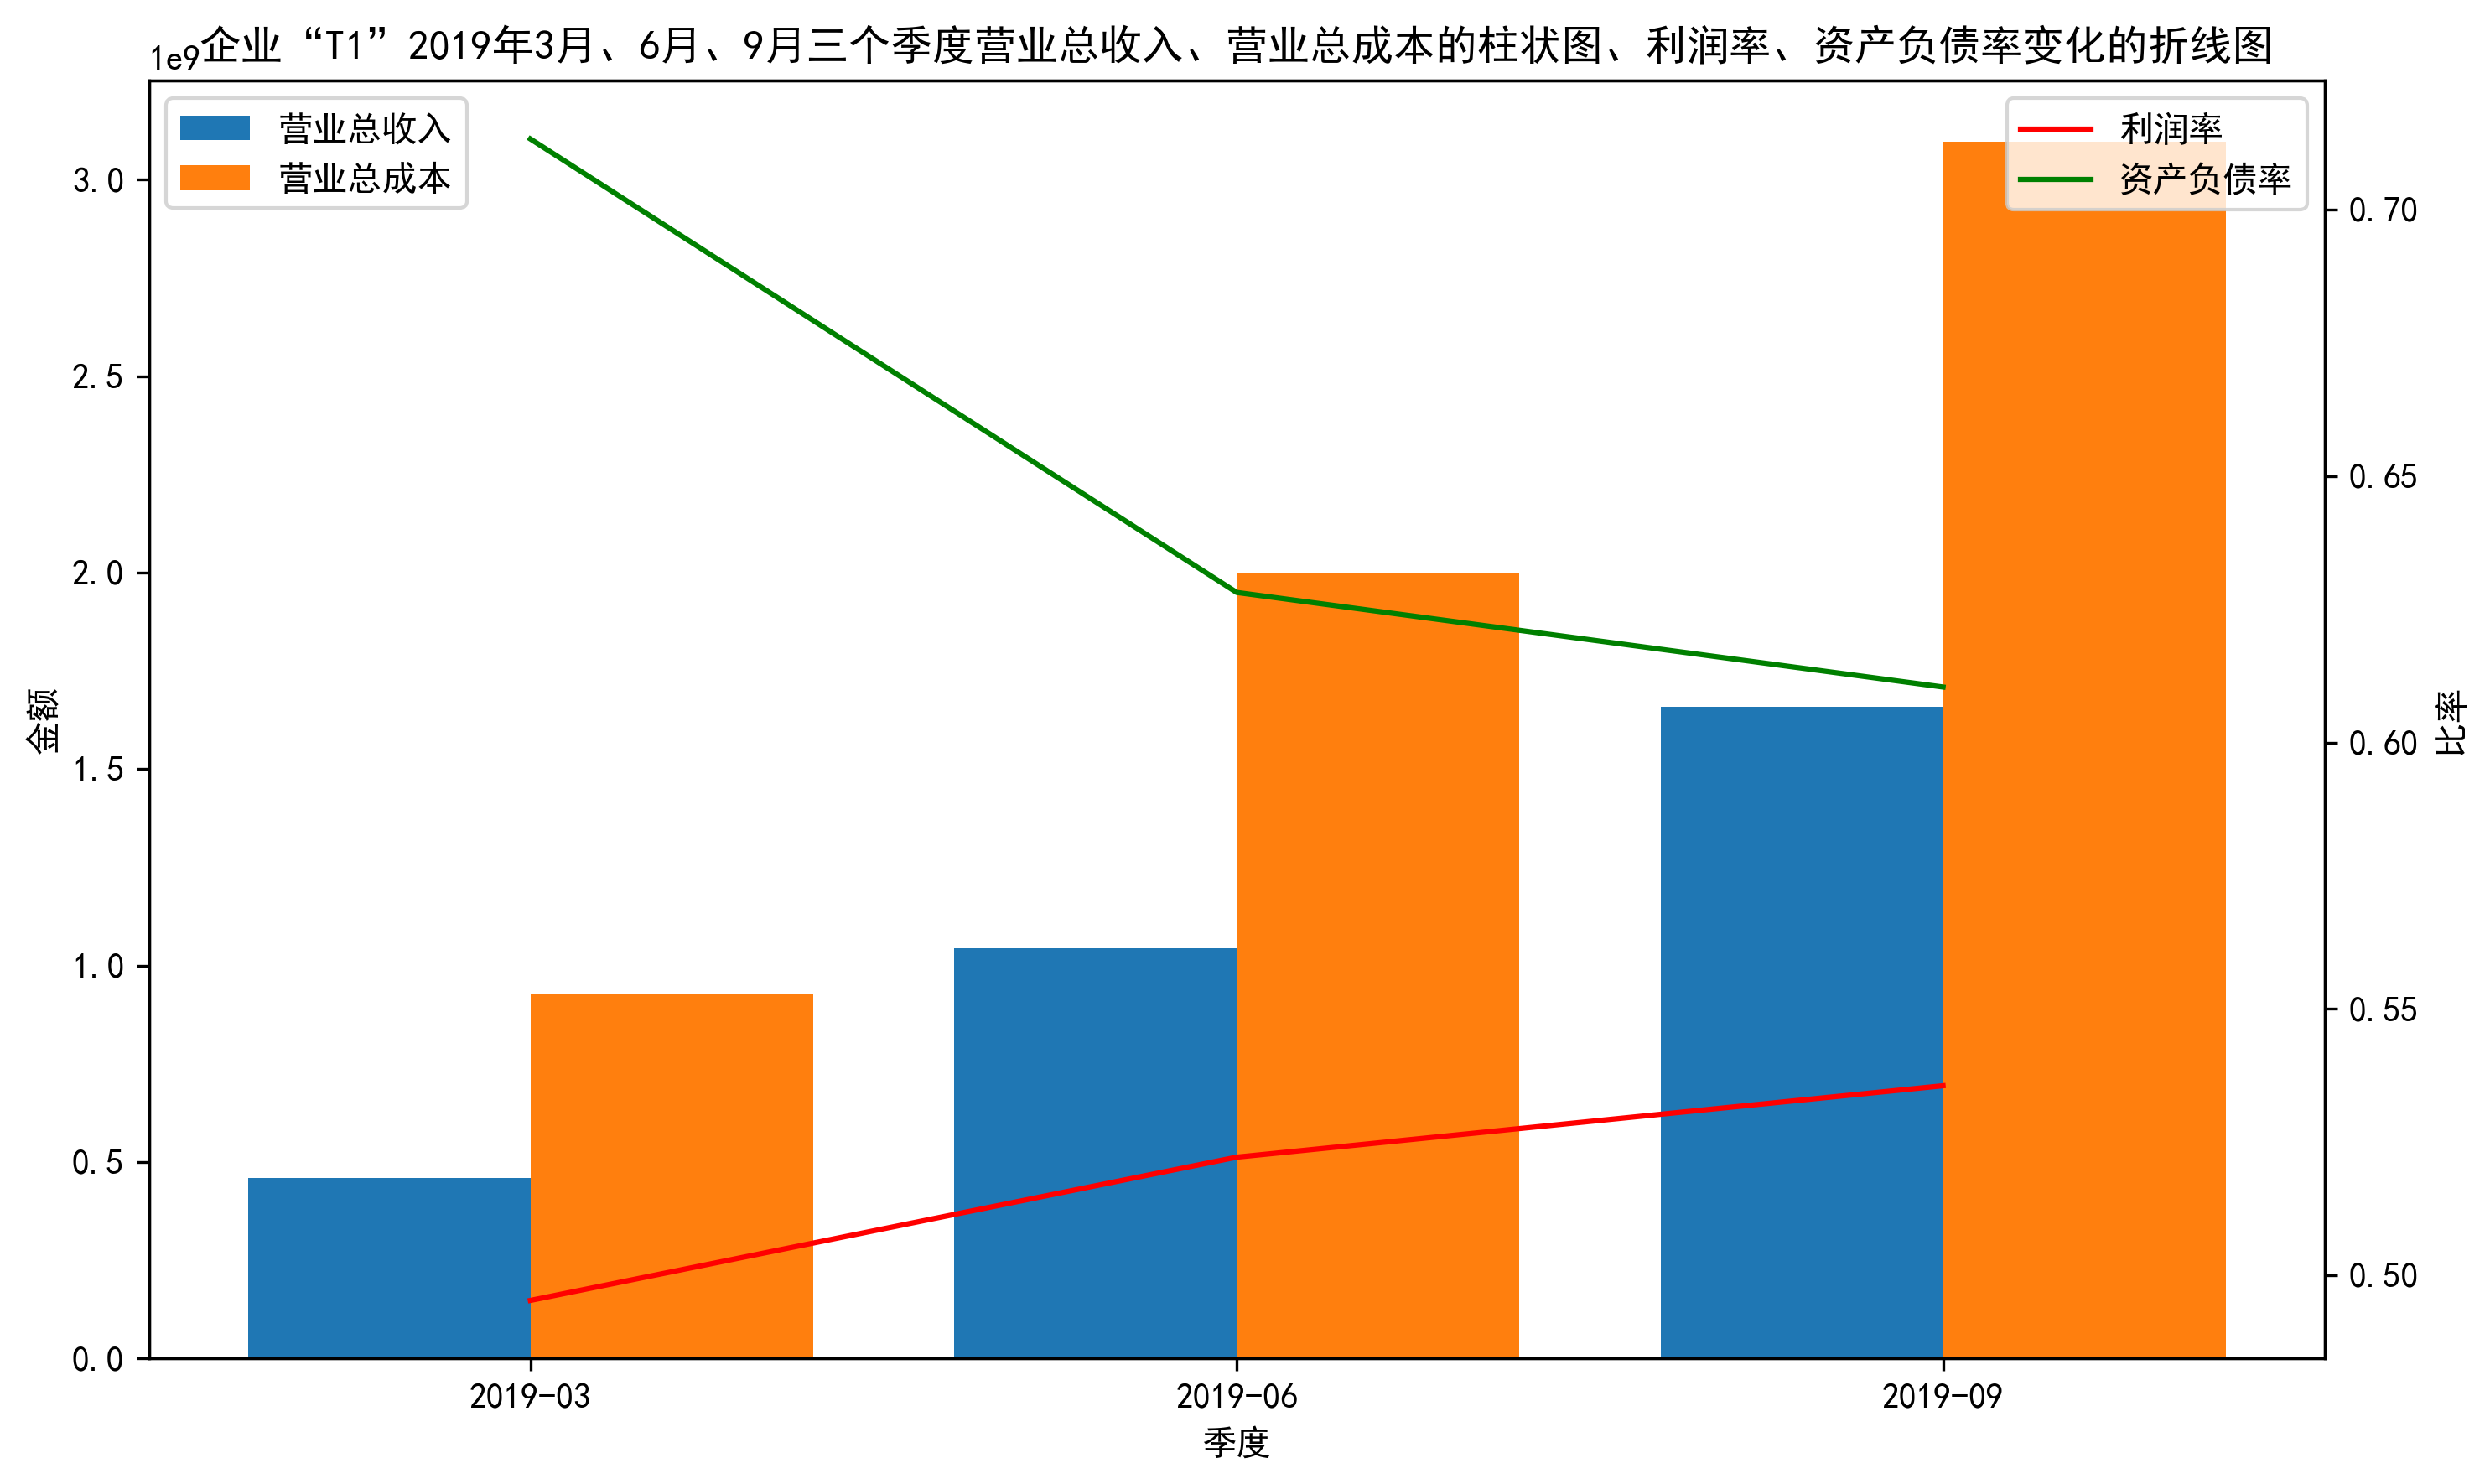

In [15]:
# 在同一张图表中，绘制企业“T1”2019 年3 月、6 月、9 月三个季度营业总收入、营业总成本的柱状图，绘制利润率、资产负债率变化的折线图
T1_2019_3 = T1_2019[T1_2019['Accper'] == '2019-03']
T1_2019_6 = T1_2019[T1_2019['Accper'] == '2019-06']
T1_2019_9 = T1_2019[T1_2019['Accper'] == '2019-09']
# 创建一个图表
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制营业总收入和营业总成本的柱状图
bar_width = 0.4
index = range(3)

bar1 = ax1.bar([i - bar_width/2 for i in index], [T1_2019_3['B001000000'].values[0], T1_2019_6['B001000000'].values[0], T1_2019_9['B001000000'].values[0]], bar_width, label='营业总收入')
bar2 = ax1.bar([i + bar_width/2 for i in index], [T1_2019_3['B001100000'].values[0], T1_2019_6['B001100000'].values[0], T1_2019_9['B001100000'].values[0]], bar_width, label='营业总成本')

ax1.set_xlabel('季度')
ax1.set_ylabel('金额')
ax1.set_title('企业“T1”2019年3月、6月、9月三个季度营业总收入、营业总成本的柱状图、利润率、资产负债率变化的折线图')
ax1.set_xticks(index)
ax1.set_xticklabels(['2019-03', '2019-06', '2019-09'])
ax1.legend()

# 创建第二个 y 轴，用于绘制折线图
ax2 = ax1.twinx()

# 绘制利润率和资产负债率的折线图
ax2.plot(['2019-03', '2019-06', '2019-09'], [T1_2019_3['利润率'].values[0], T1_2019_6['利润率'].values[0], T1_2019_9['利润率'].values[0]], 'r-', label='利润率')
ax2.plot(['2019-03', '2019-06', '2019-09'], [T1_2019_3['资产负债率'].values[0], T1_2019_6['资产负债率'].values[0], T1_2019_9['资产负债率'].values[0]], 'g-', label='资产负债率')
ax2.set_ylabel('比率')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.savefig('plot_2.2.4.png')
plt.show()


In [ ]:
# 任务2.3

In [ ]:
# 

In [ ]:
# 任务3

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv('financial_data.csv')
# 计算各个指标与利润总额的相关性，挑选相关度最高的 5 个指标
corr = data.corr()
corr['LRZE'].sort_values(ascending=False).head(6)

LRZE       1.000000
YYSR       0.782726
YWFY       0.772832
YYCB       0.737736
YYSJJFJ    0.565440
ZCJZSS     0.238524
Name: LRZE, dtype: float64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10994 entries, 0 to 10993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TICKER_SYMBOL  10994 non-null  int64  
 1   END_DATE       10994 non-null  int64  
 2   LDBL           10994 non-null  float64
 3   LXBZBS         10994 non-null  float64
 4   ZCFZL          10994 non-null  float64
 5   CHZZL          10994 non-null  float64
 6   ZCBCL          10994 non-null  float64
 7   CHZLDZCB       10994 non-null  float64
 8   CQZBSYL        10994 non-null  float64
 9   YYMLL          10994 non-null  float64
 10  YSL            10994 non-null  float64
 11  YSZKZZL        10994 non-null  float64
 12  YYSR           10994 non-null  float64
 13  YYCB           10994 non-null  float64
 14  YYSJJFJ        10994 non-null  float64
 15  YWFY           10994 non-null  float64
 16  ZCJZSS         10994 non-null  float64
 17  LRZE           10994 non-null  float64
 18  FLAG  

In [18]:
# 将上述特征 提取出来
columns = ['YYSR', 'YWFY', 'YYCB', 'YYSJJFJ', 'ZCJZSS']
# 提取特征和标签
X = data[columns]
y = data['LRZE']
# 划分训练集和测试集

X_train, X_test, y_train, y_test = train_test_split(X, y)
# 数据进行标准化处理
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
# 使用线性回归模型进行训练
lr = LinearRegression()
# 训练模型
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9024277377292886

均方误差： 2.4144046801056915e+17
平均绝对误差： 143456189.68511832
R2得分： 0.9024277377292886


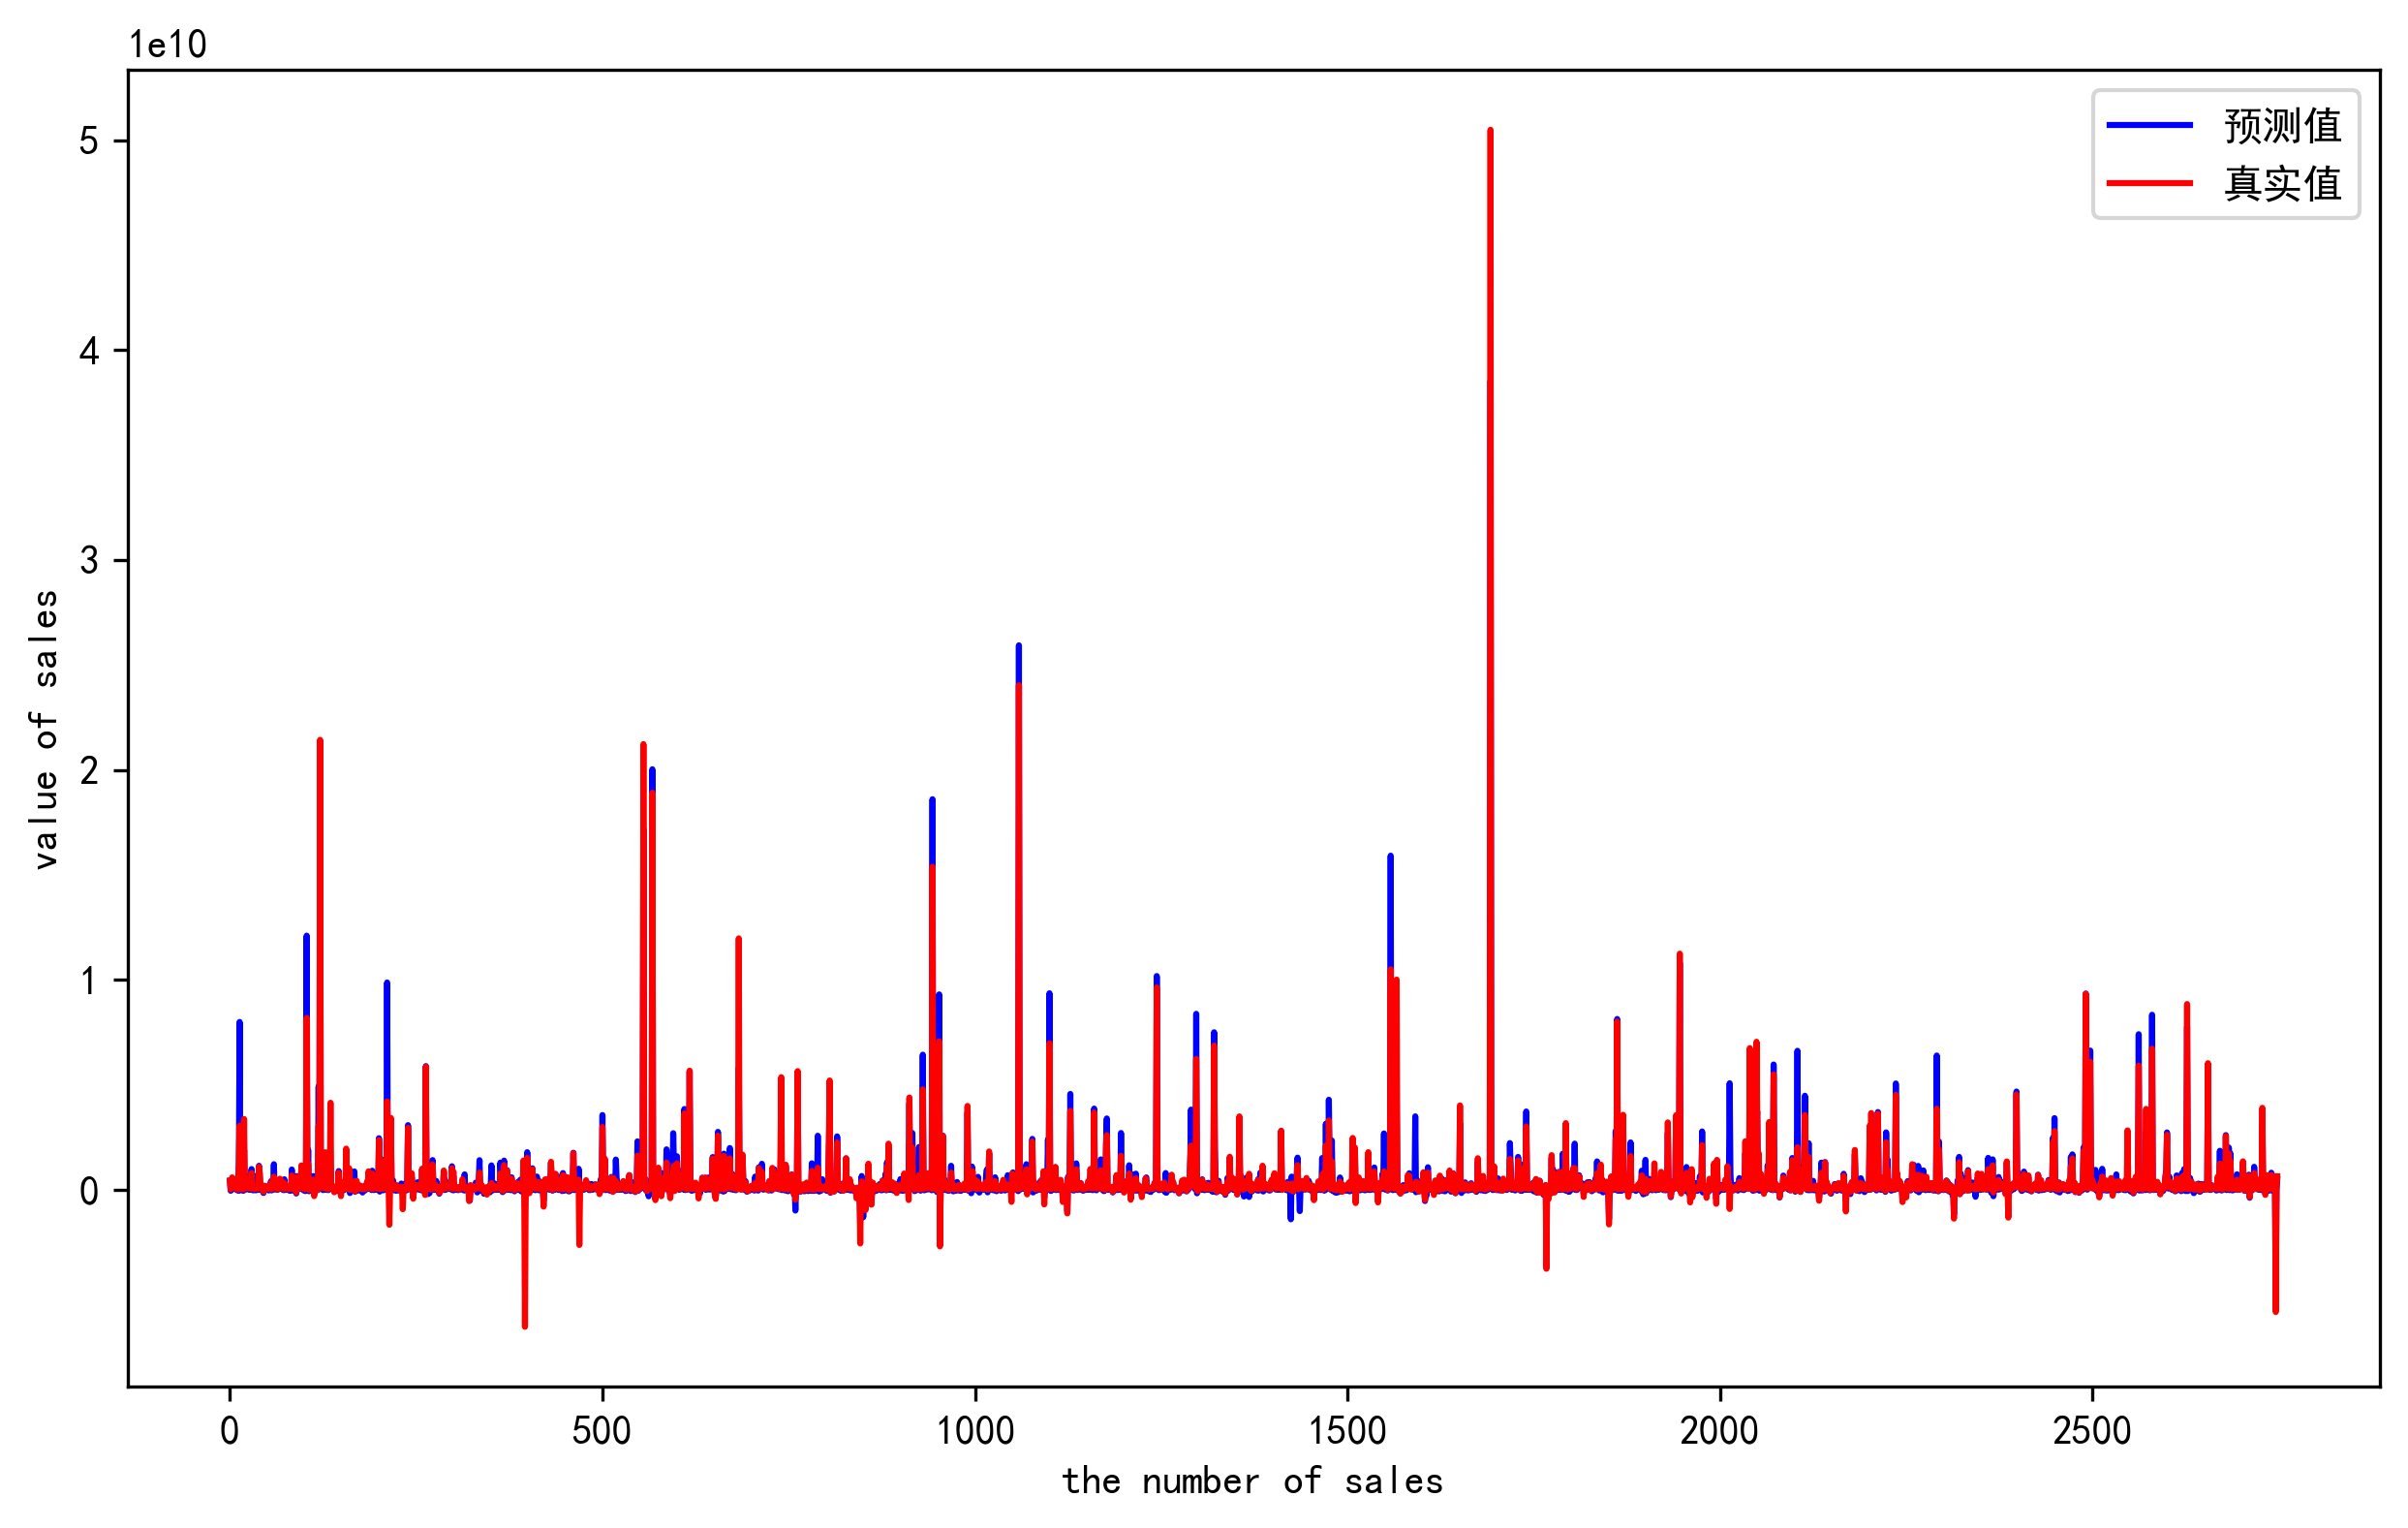

In [19]:
# 模型评估
y_pred = lr.predict(X_test)
print('均方误差：', mean_squared_error(y_test, y_pred))
print('平均绝对误差：', mean_absolute_error(y_test, y_pred))
print('R2得分：', r2_score(y_test, y_pred))

#画出拟合线
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_pred)), y_pred, 'b', label="预测值")
plt.plot(range(len(y_pred)), y_test, 'r', label="真实值")
plt.legend(loc="upper right")  # 显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.savefig('plot_3.1.png')
plt.show()

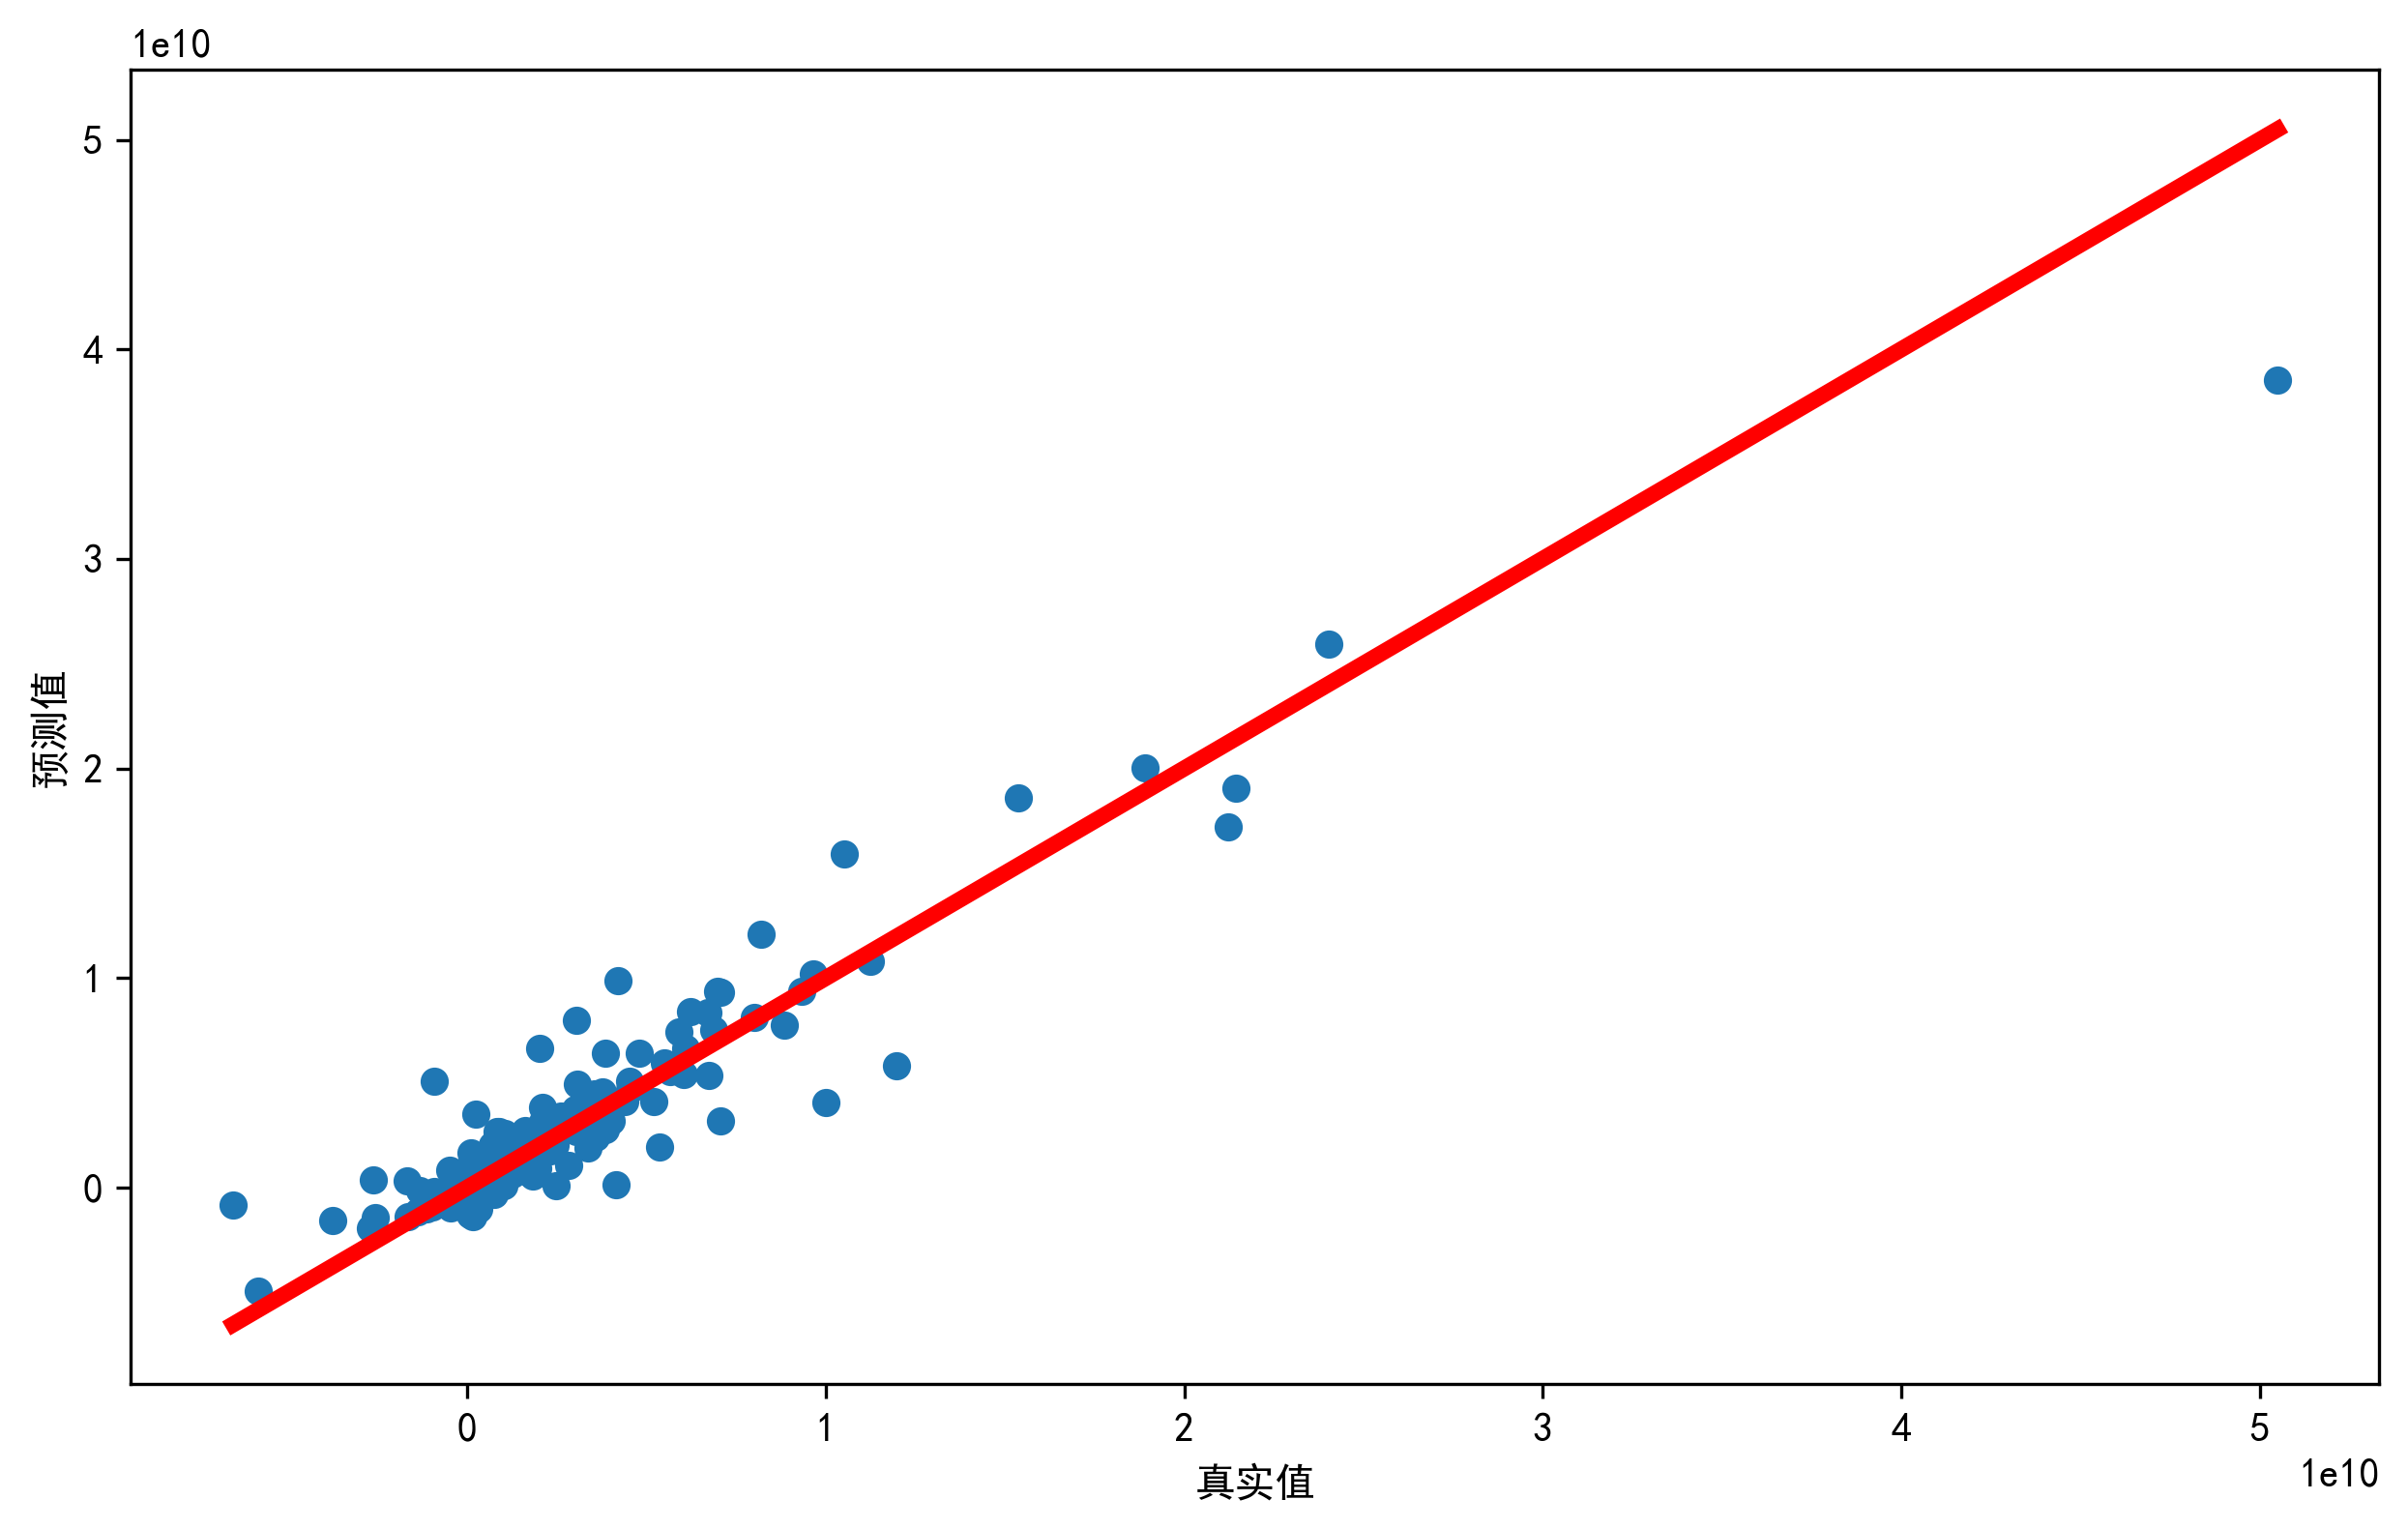

In [20]:
# 画出散点图及其拟合线
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=4)
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.savefig('plot_3.2.png')
plt.show()

In [21]:
data = pd.read_csv('test.csv')
pre = data.copy()
data = data[columns]
data = ss.transform(data)

In [22]:
y_pred= lr.predict(data)
pre['LRZE'] = y_pred

In [23]:
pre.iloc[:,[0,-1]]

,TICKER_SYMBOL,LRZE
0,4953174,3.857422e+08
1,4961537,3.492356e+08
2,4962538,1.050590e+08
3,4968740,1.141874e+08
4,4973917,3.694010e+07
5,4978589,3.491485e+08
6,4978721,7.569627e+07
7,4986535,7.981451e+07
8,4990739,2.321788e+08
9,4990942,4.341272e+07


In [25]:
# 任务3.3
# 提取关键因子指标
index = ['LDBL','ZCFZL','CHZZL','ZCBCL','YSZKZZL']
data = pd.read_csv('financial_data.csv')
X = data[index]
y = data['FLAG']
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y)
# 使用分类器进行训练
dtc = DecisionTreeClassifier()
# 训练模型
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9996362313568571

In [26]:
pred_data = pd.read_csv('financial_data_new.csv')
pred_data = pred_data[index]

y_pred = dtc.predict(pred_data)
pred_data['FLAG'] = y_pred
pred_data['FLAG'].value_counts()

0    4
1    1
Name: FLAG, dtype: int64

In [27]:
pred_data

,LDBL,ZCFZL,CHZZL,ZCBCL,YSZKZZL,FLAG
0,1.08190,0.43580,2.36745,0.02721,0.21712,0
1,1.18628,0.51038,3.13126,0.11496,0.19357,0
2,0.85226,0.57374,0.81894,0.02719,0.24420,0
3,1.30825,0.48336,0.36807,0.02947,1.24359,1
4,0.90699,0.52007,2.76637,0.09150,0.21569,0


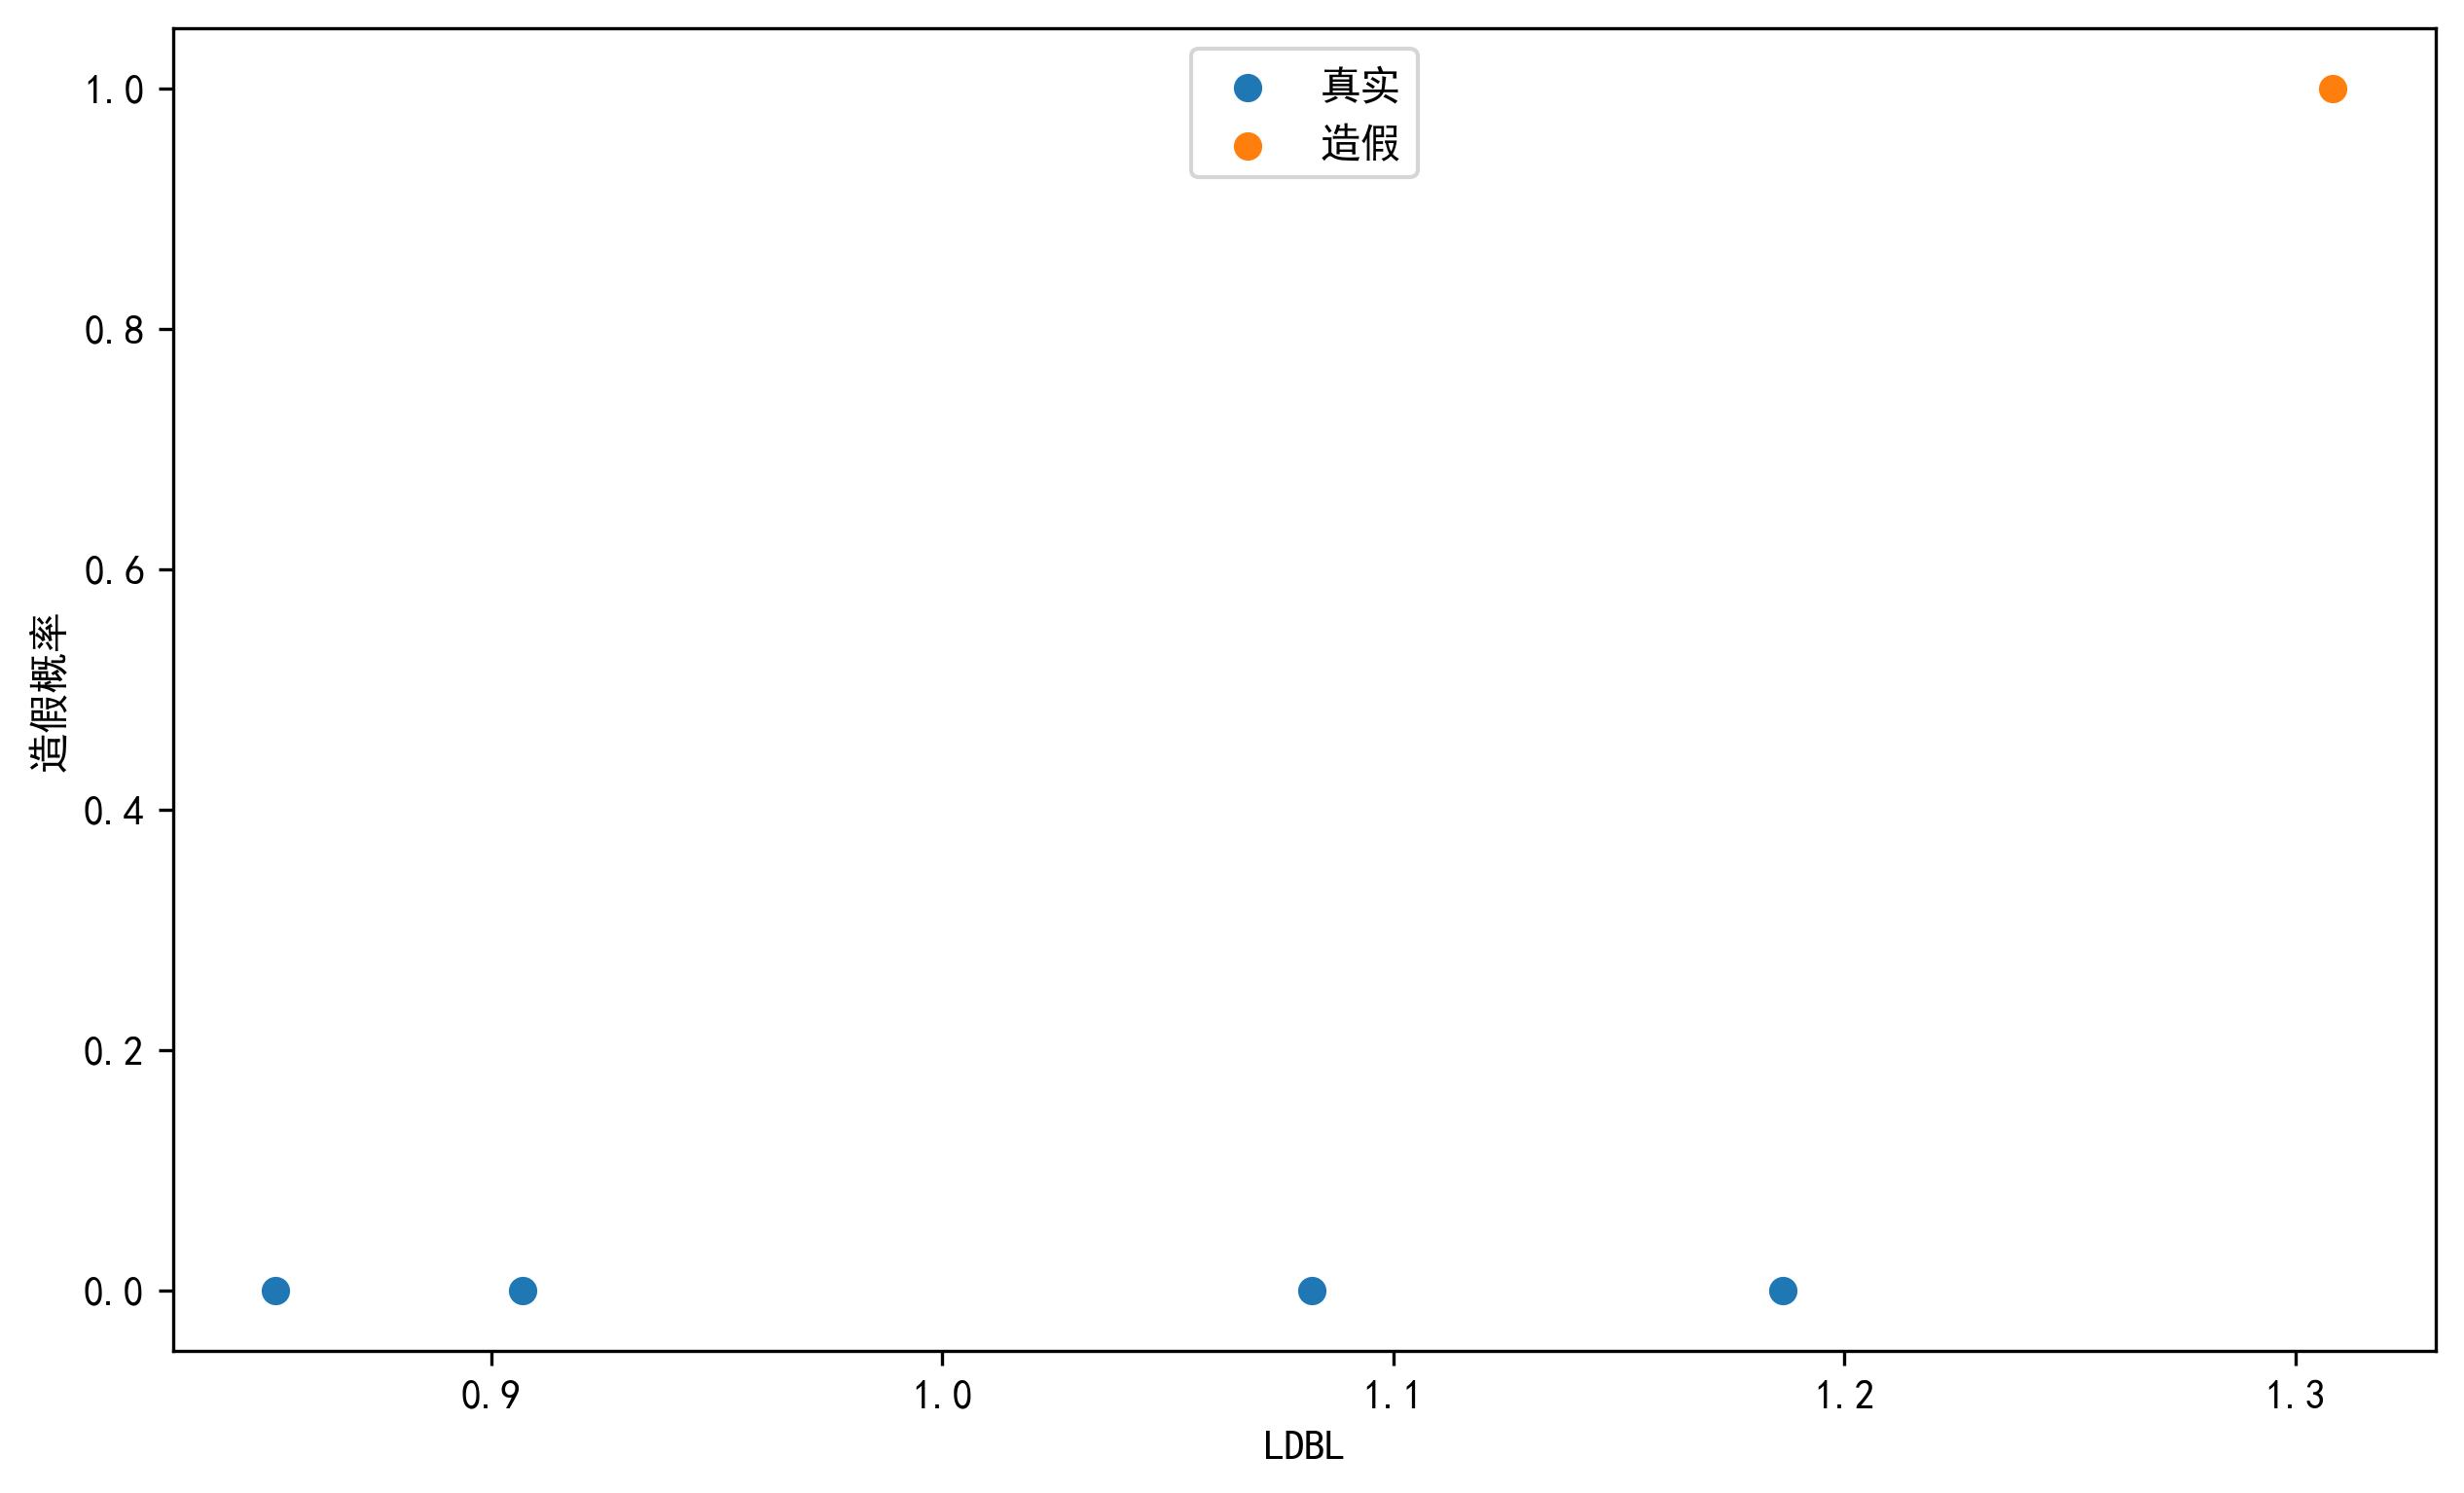

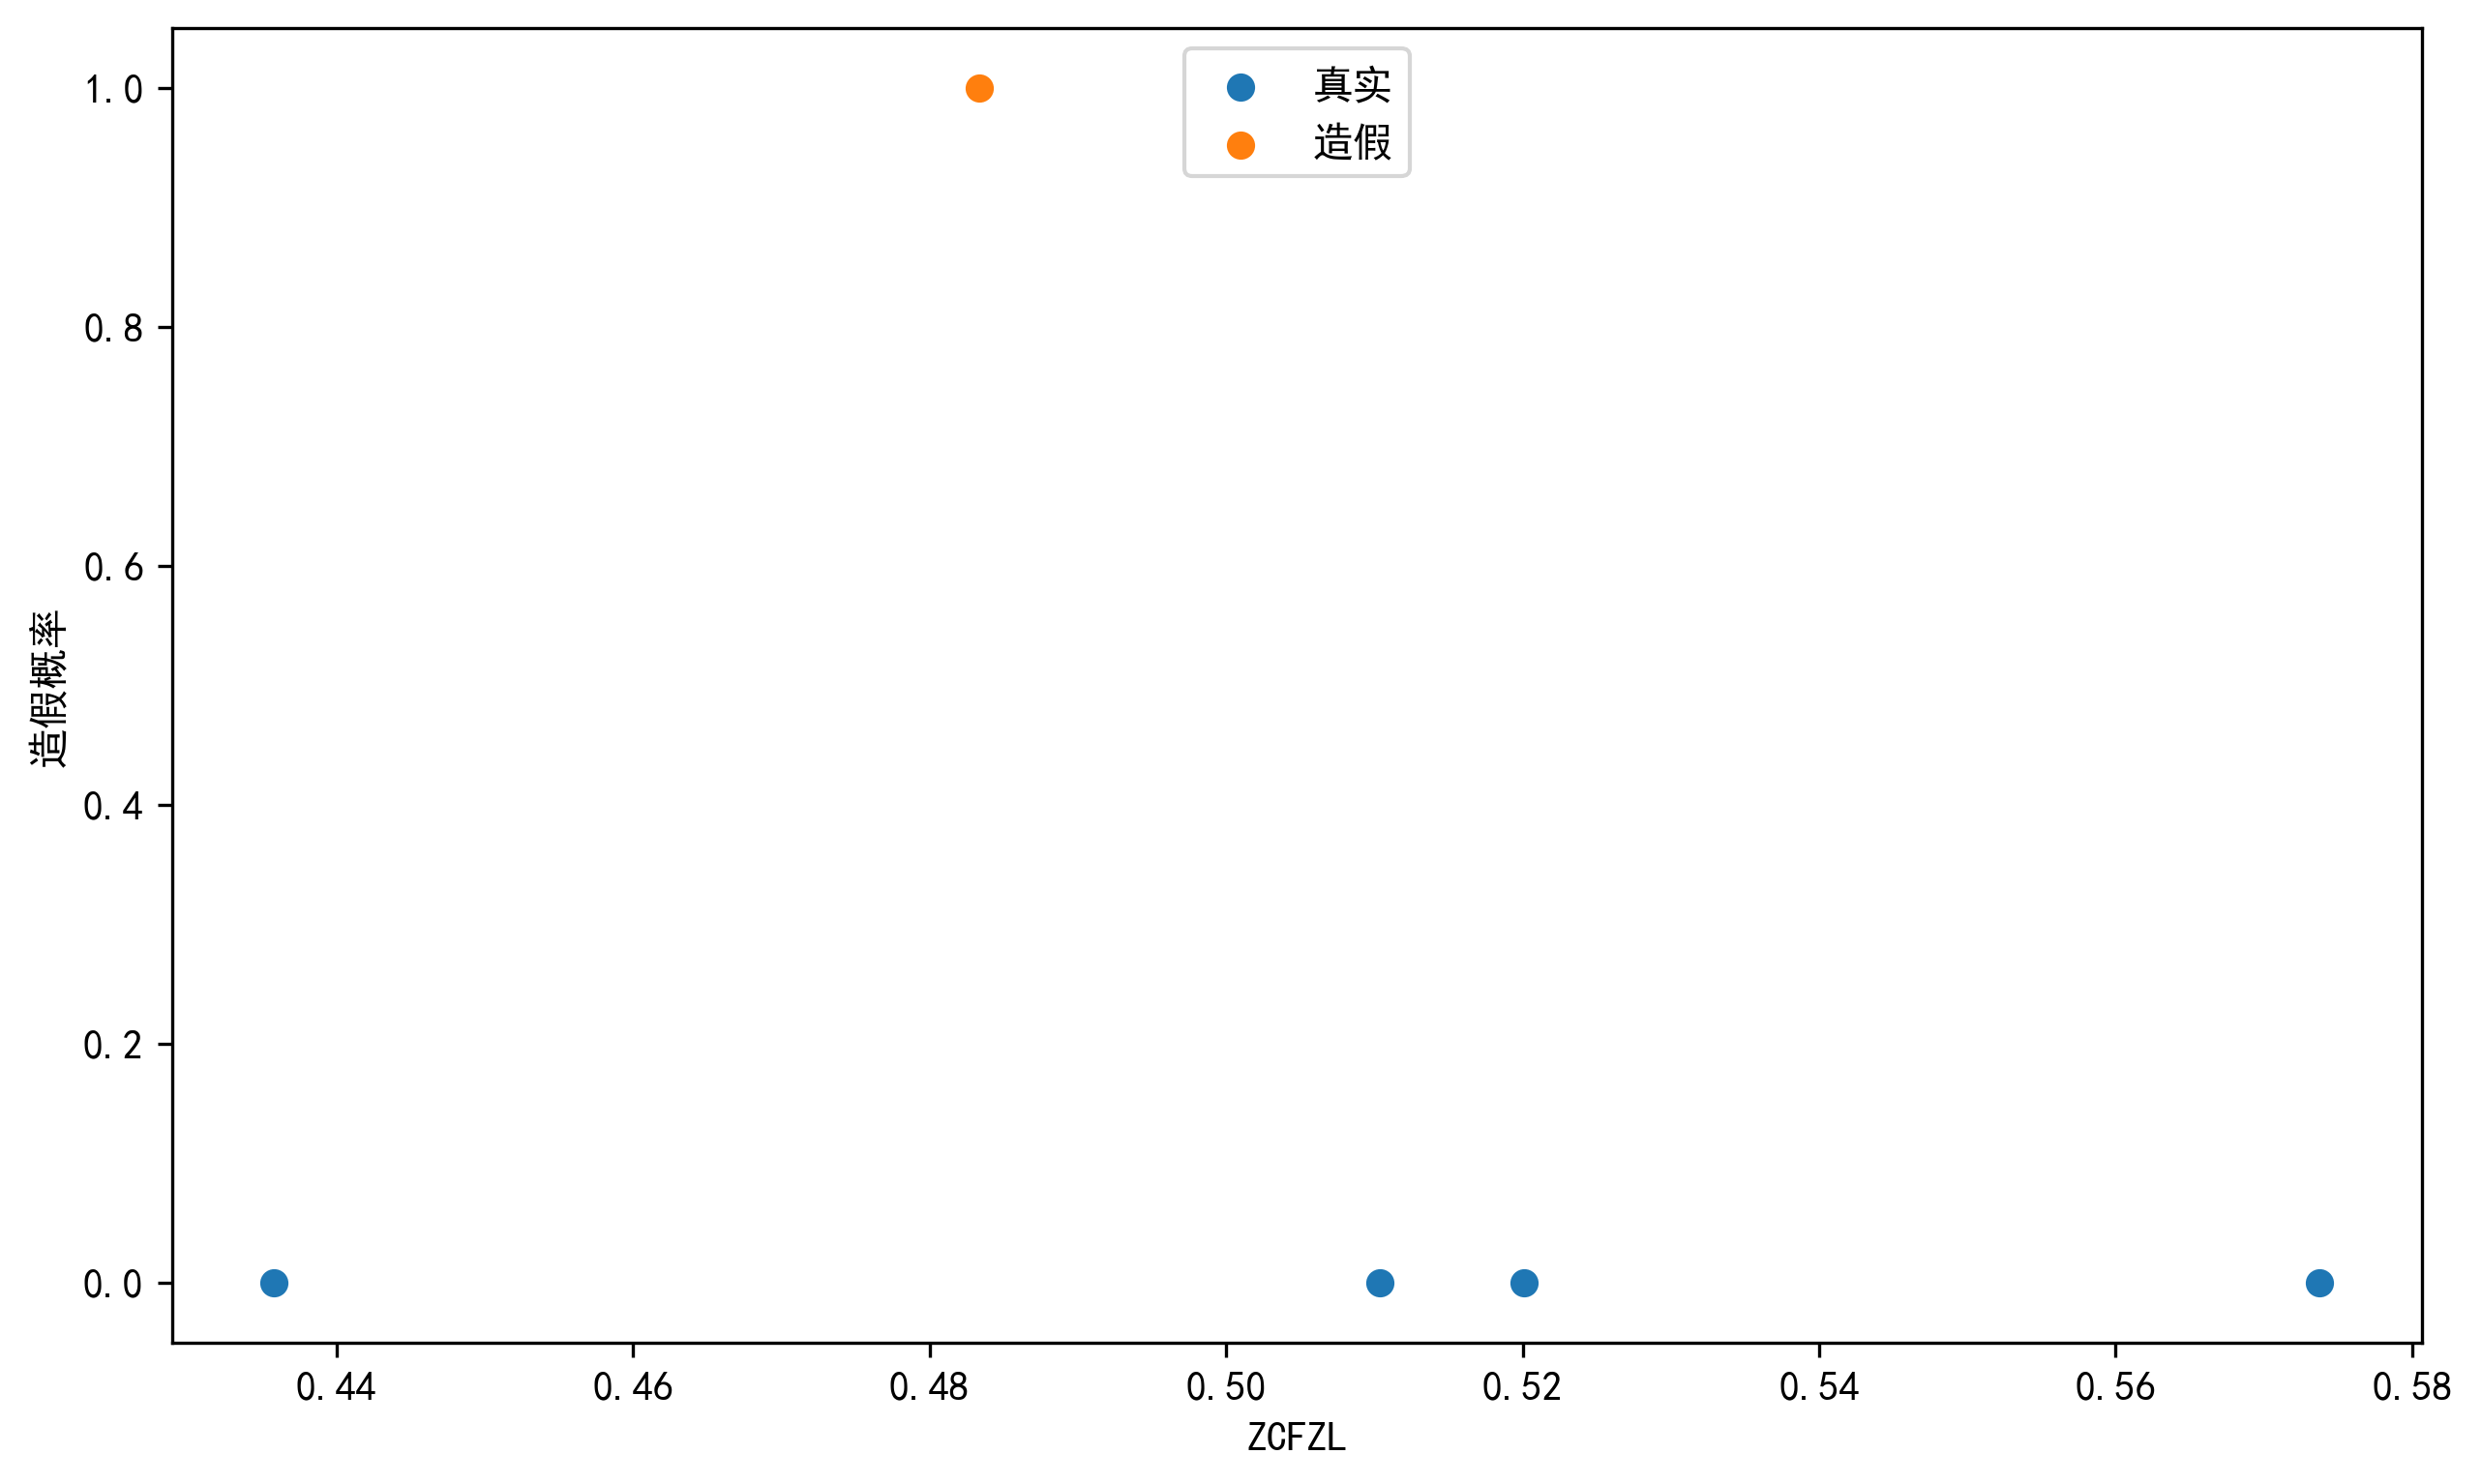

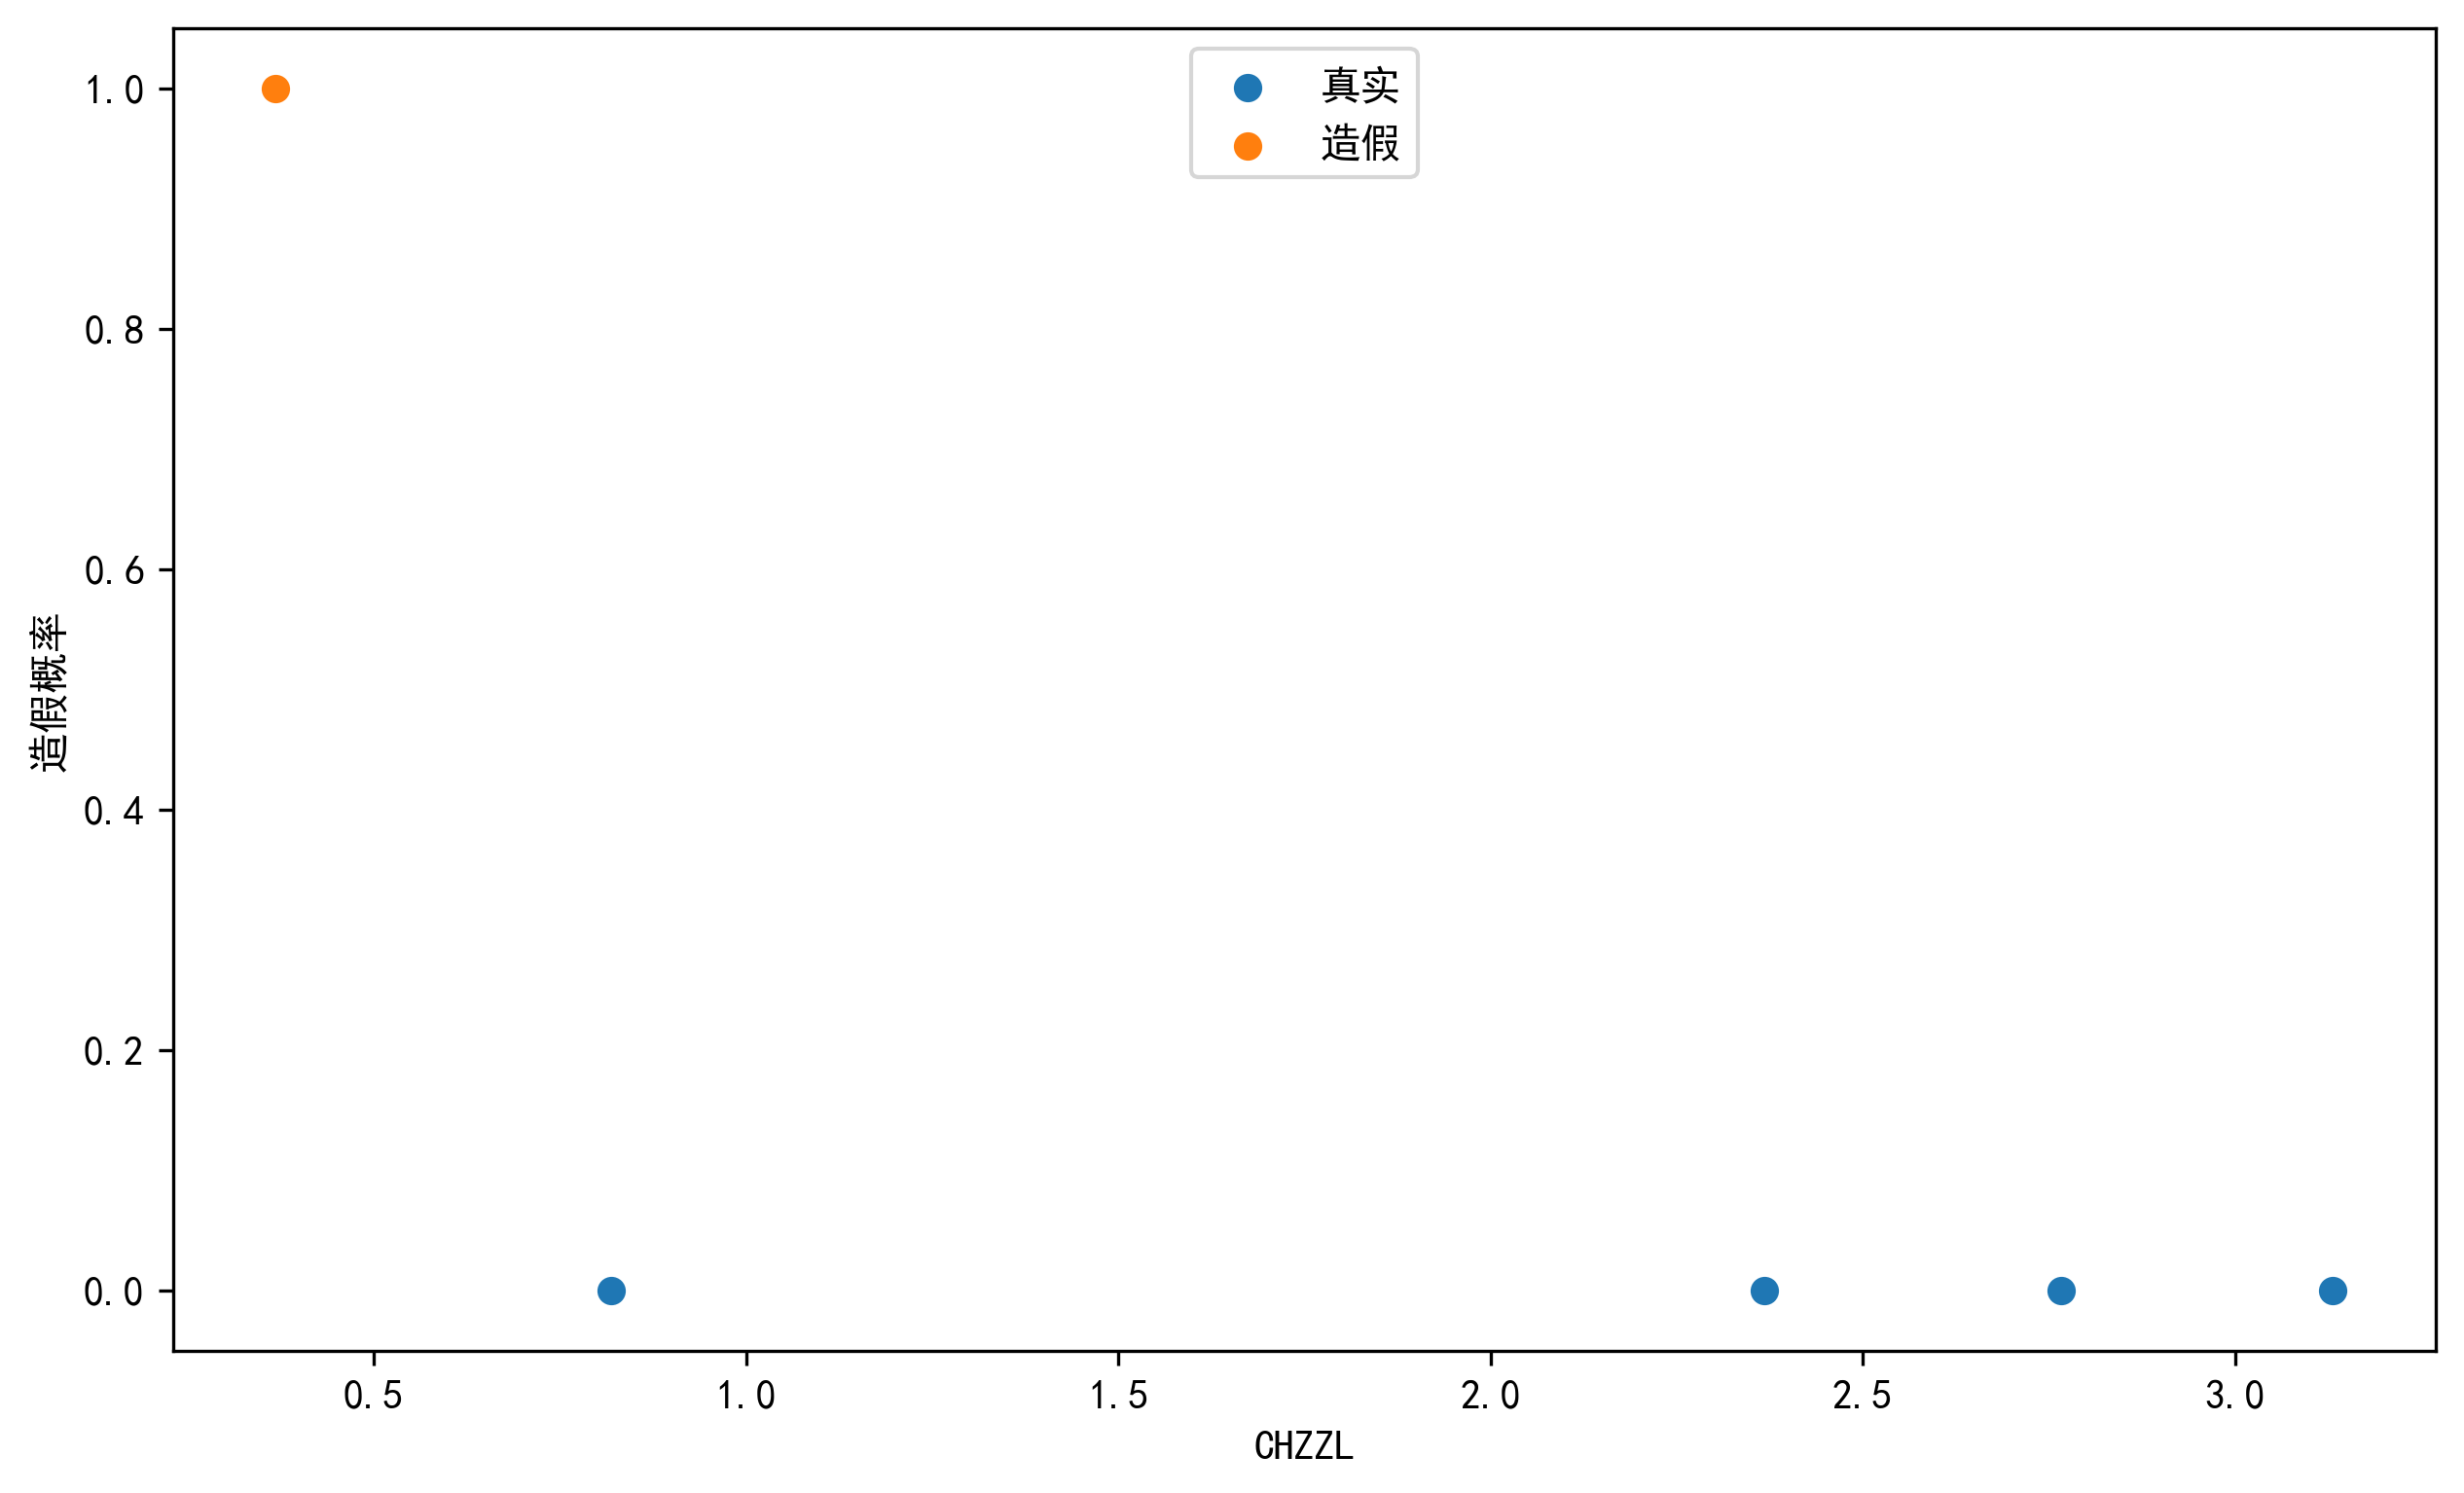

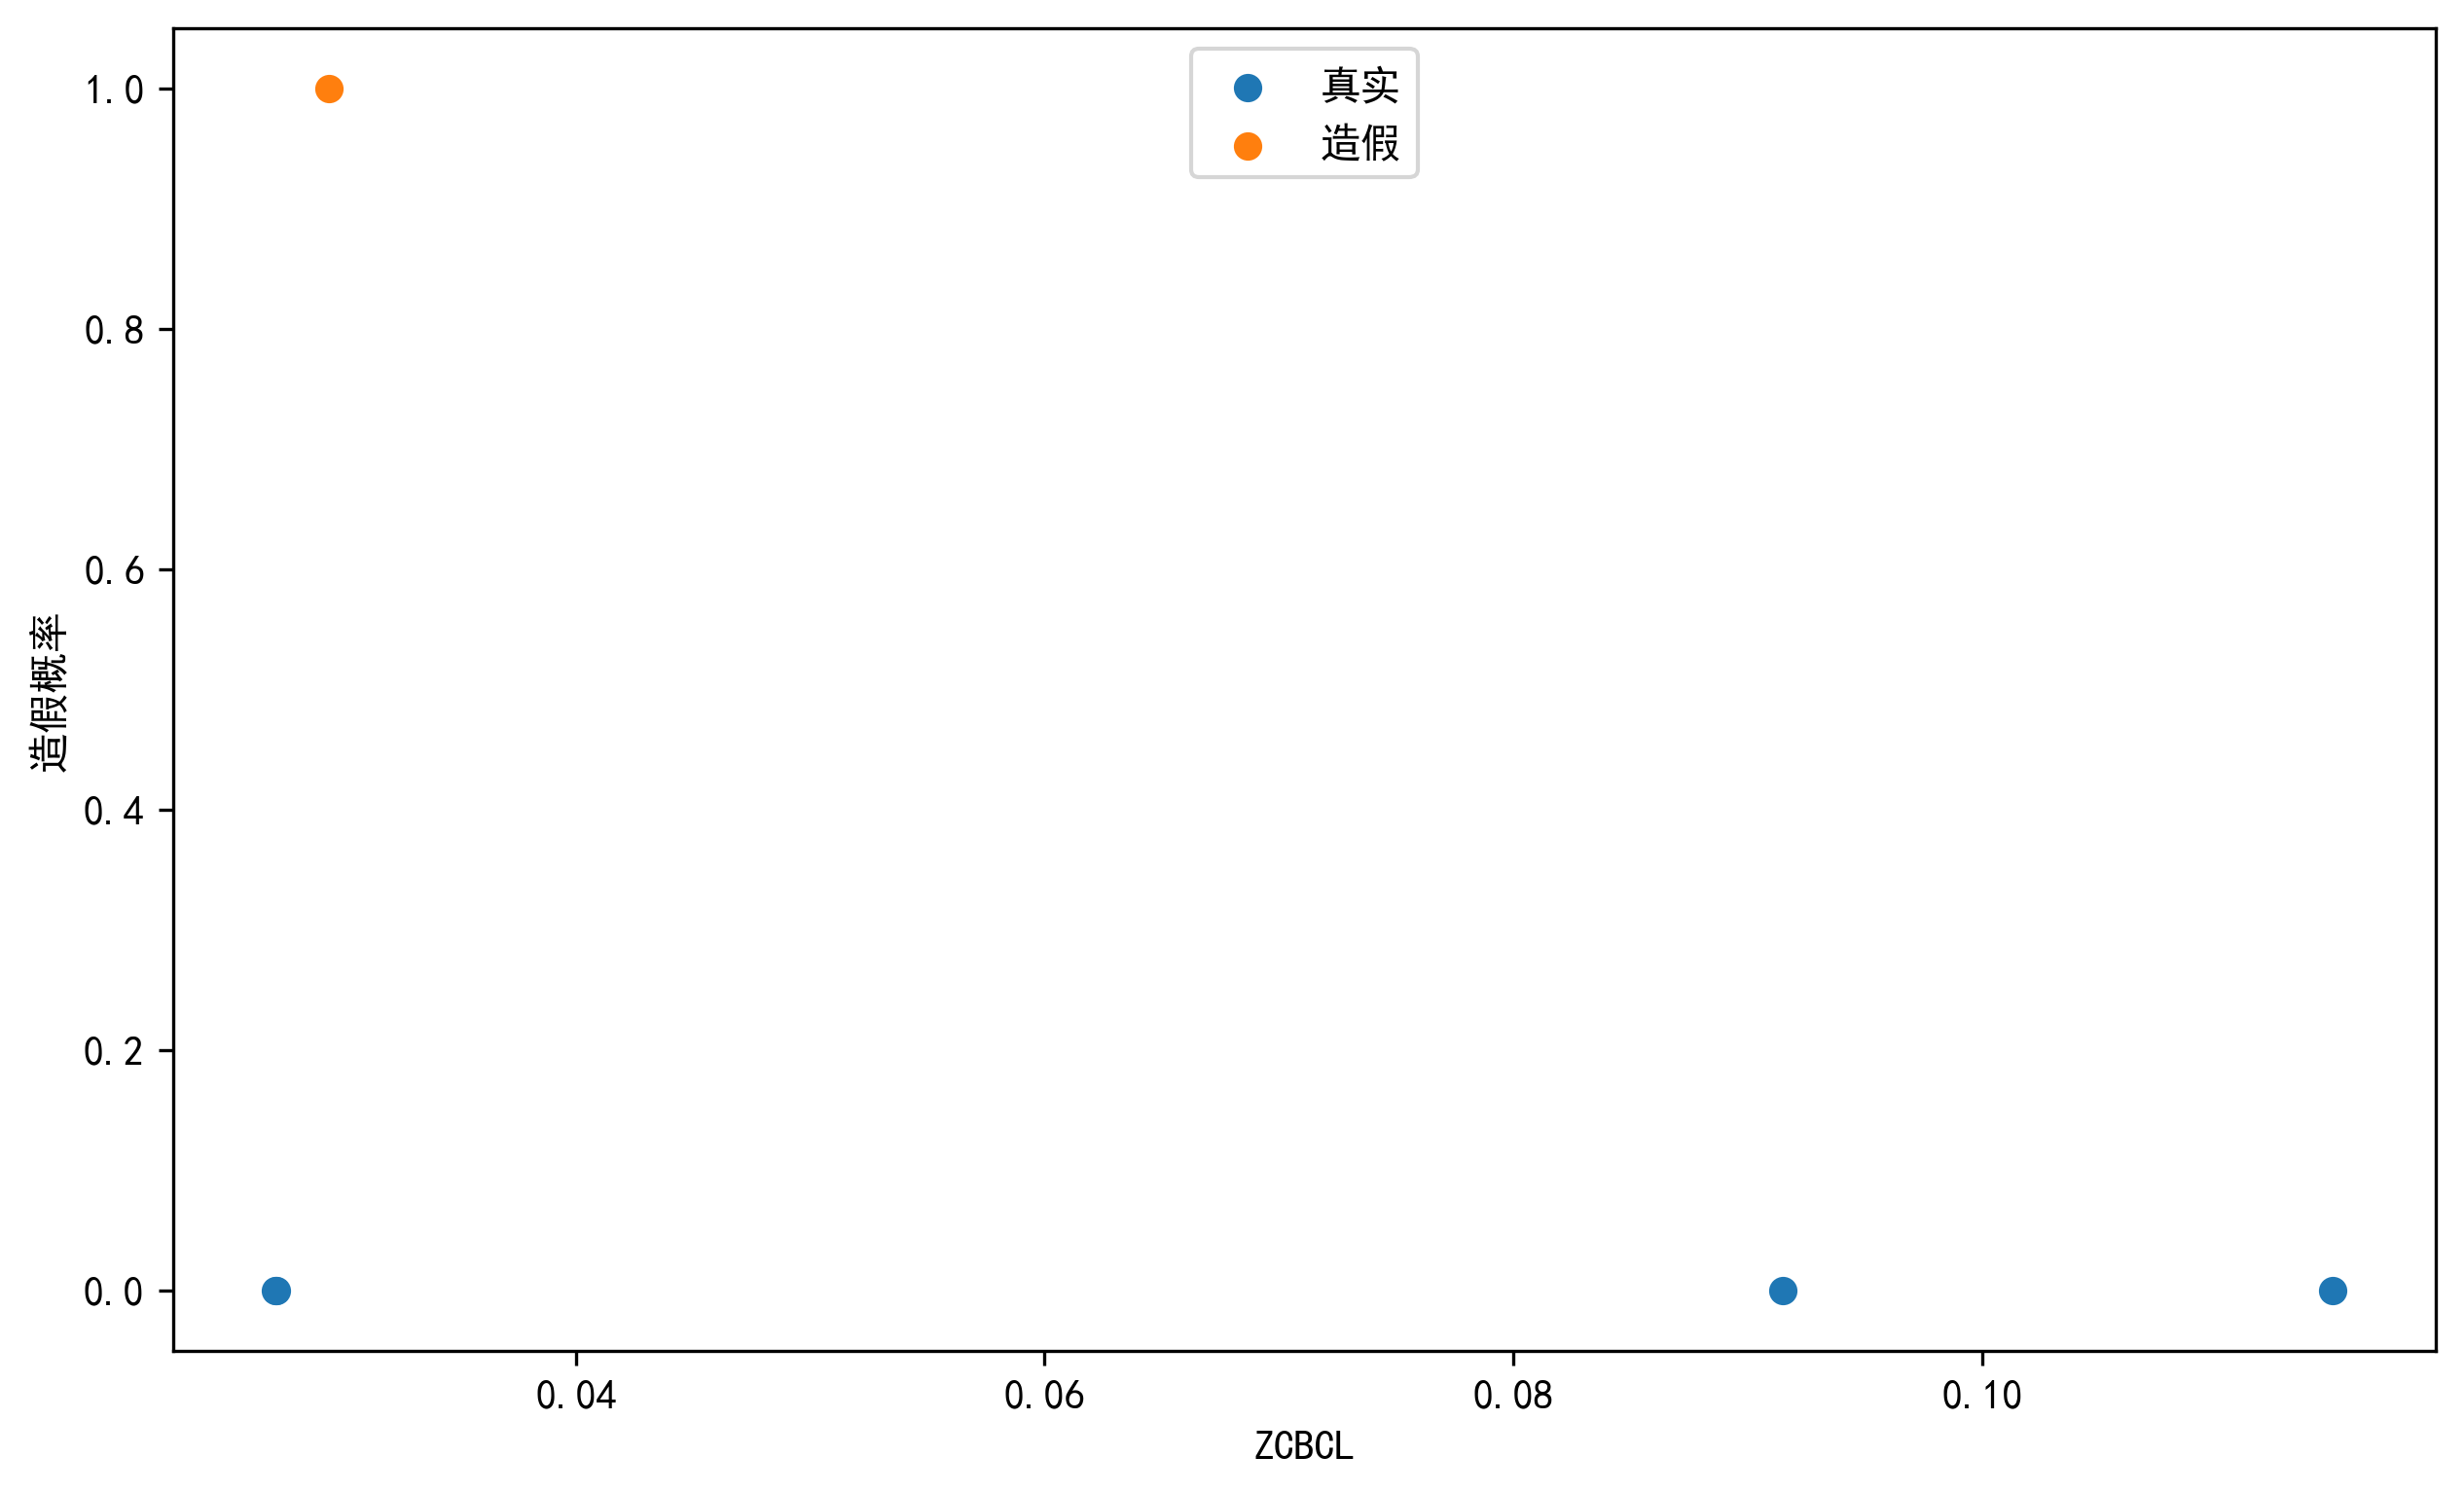

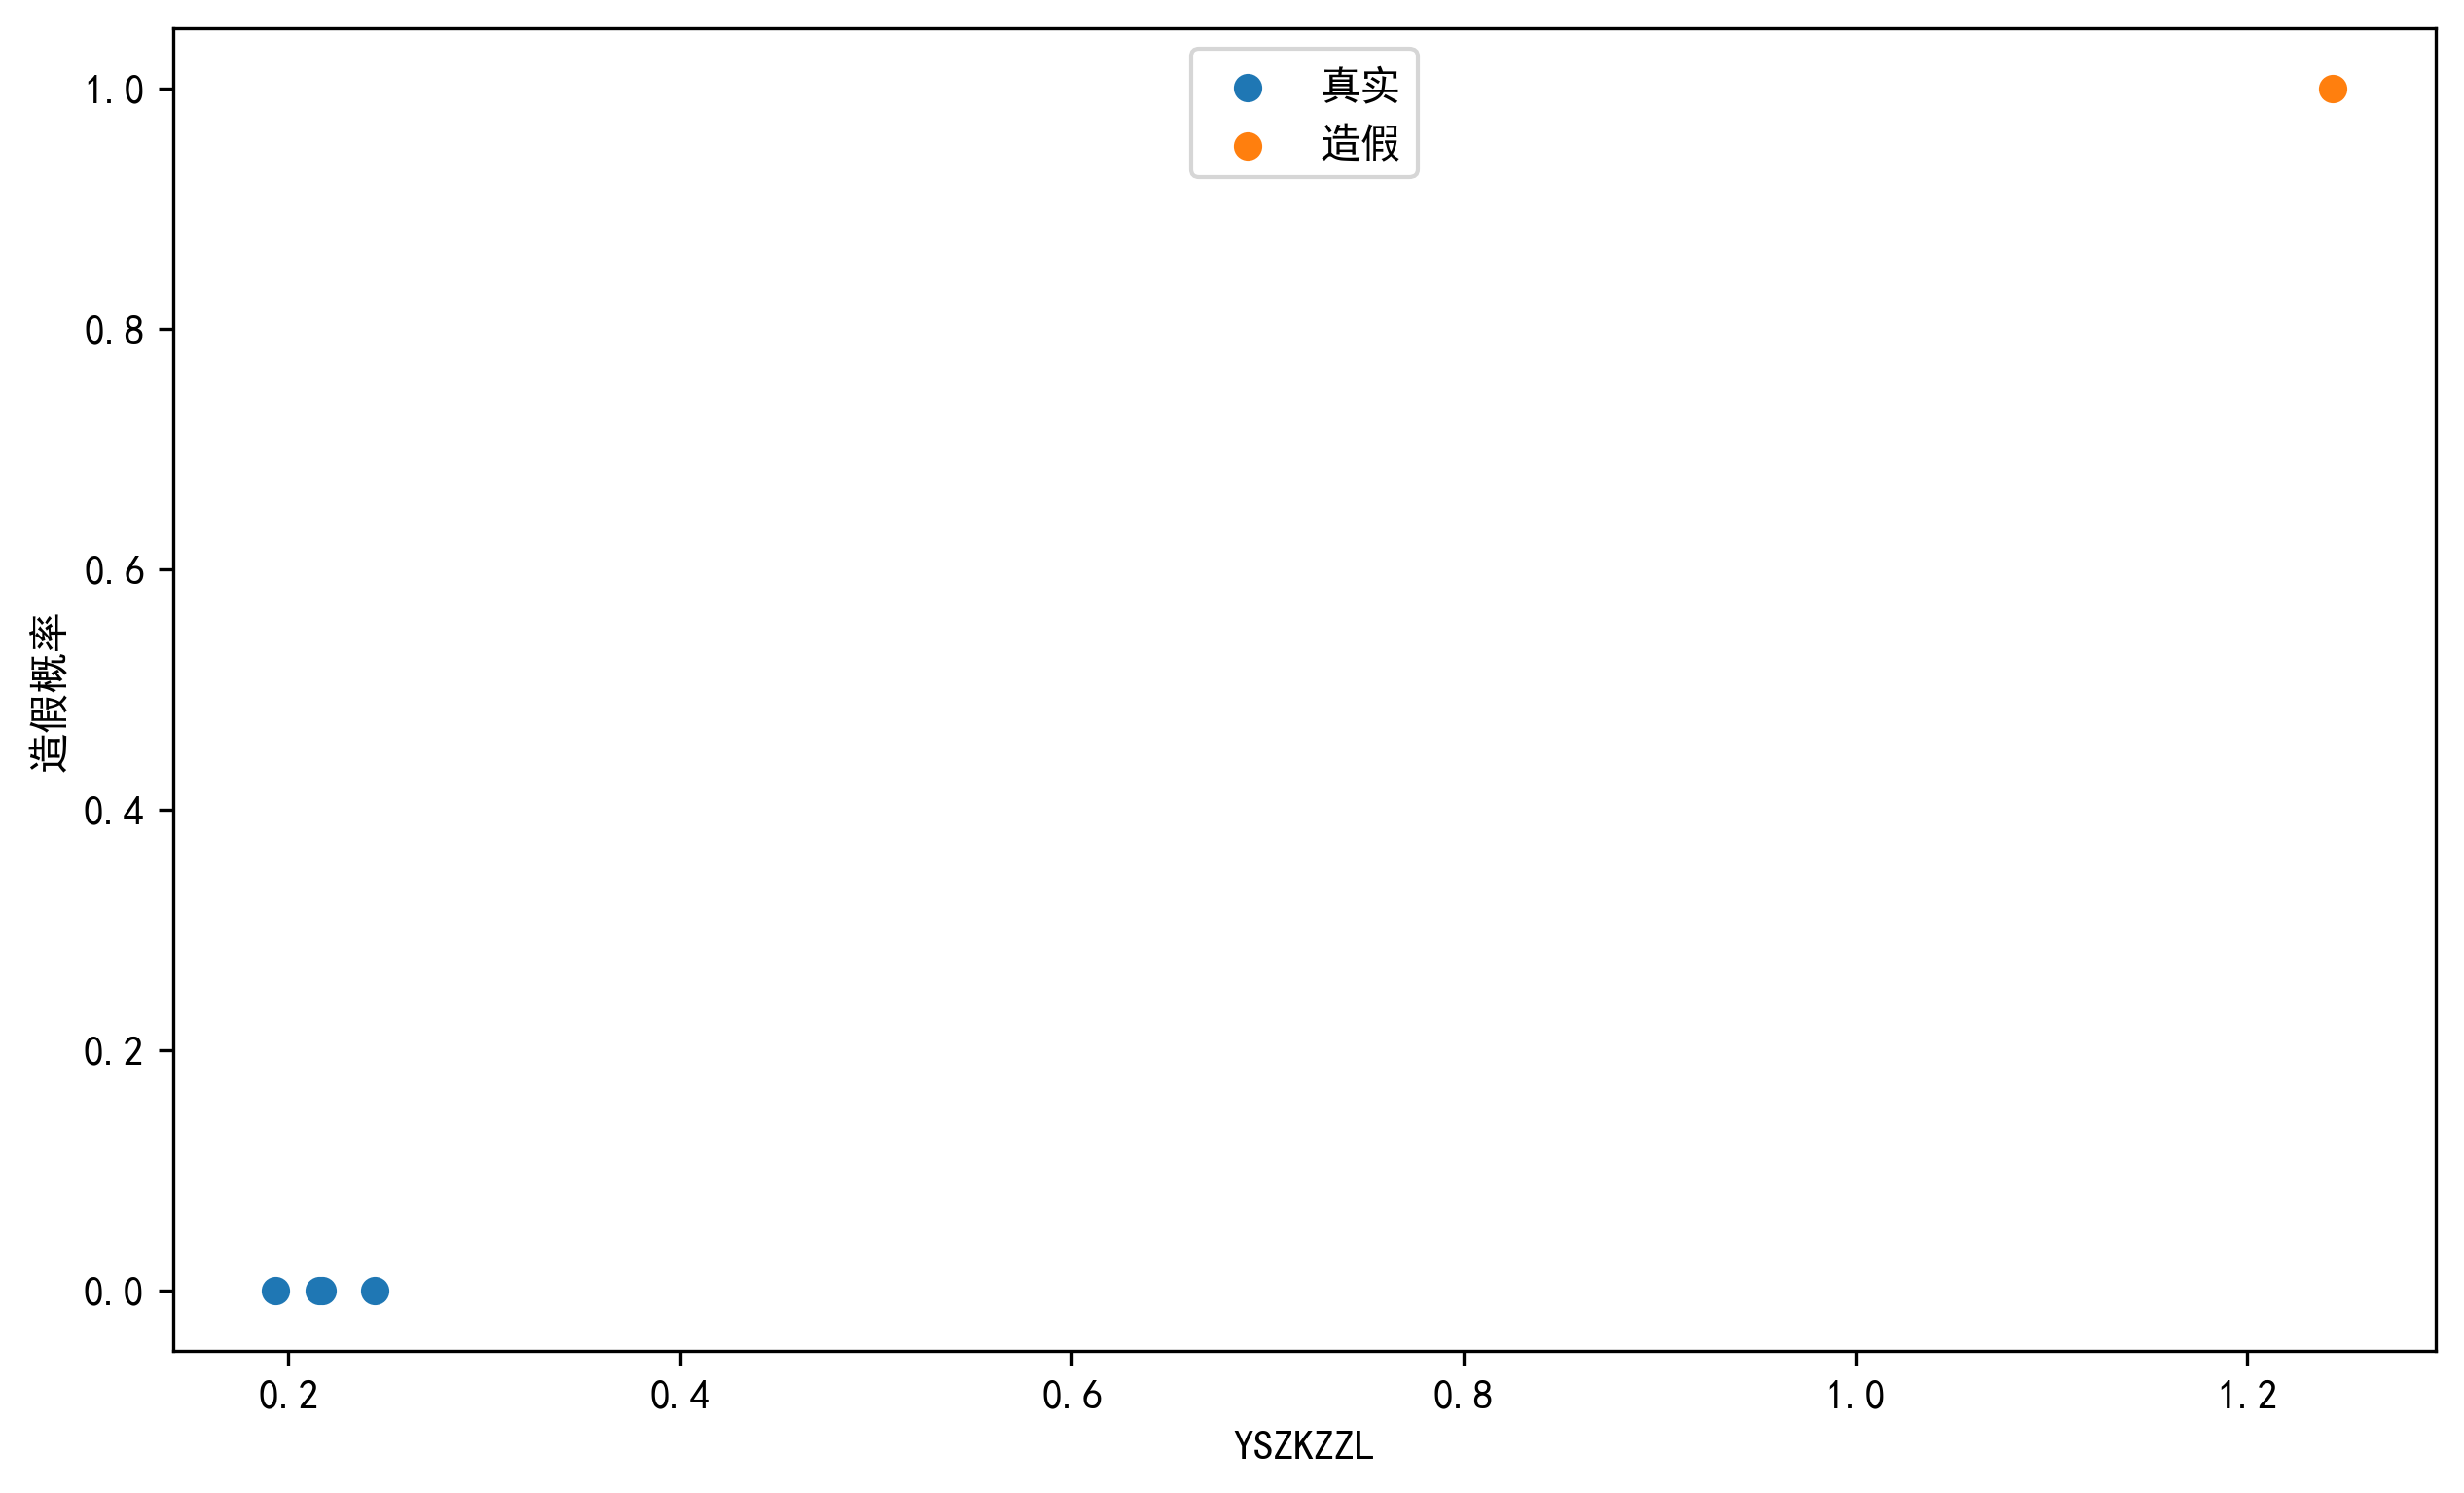

In [29]:
for i in index:
        plt.figure(figsize=(10, 6))
        plt.scatter(pred_data[pred_data['FLAG'] == 0][i], pred_data[pred_data['FLAG'] == 0]['FLAG'], label='真实')
        plt.scatter(pred_data[pred_data['FLAG'] == 1][i], pred_data[pred_data['FLAG'] == 1]['FLAG'], label='造假')
        plt.xlabel(i)
        plt.ylabel('造假概率')
        plt.legend(loc="upper center")  # 显示图中的标签
        plt.savefig('plot_3.3_{}.png'.format(i))
        plt.show()